# Climate Change Data Comparison and Correlation

This project invesgtigate 3 sets of data, Earth Surface temperature, Sea Level and Sea Ice Extend data, to look at the trend in the climate versus change to sea level and sea ice extent. 

The source of dataset is documented below:

1. <a href="https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv">Global Earth Surface Land Temperature Dataset<a>

2. <a href="https://www.kaggle.com/datasets/somesh24/sea-level-change/data">Sea Level Change Dataset]</a>

3. <a href="https://www.kaggle.com/datasets/nsidcorg/daily-sea-ice-extent-data">Sea Ice Level Dataset</a>

In [314]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

In [315]:
df_temperature = pd.read_csv('GlobalLandTemperaturesByCountry.csv', sep=',', parse_dates=True)
df_temperature.head(15)


dt  AverageTemperature  AverageTemperatureUncertainty Country
0   1743-11-01               4.384                          2.294   Åland
1   1743-12-01                 NaN                            NaN   Åland
2   1744-01-01                 NaN                            NaN   Åland
3   1744-02-01                 NaN                            NaN   Åland
4   1744-03-01                 NaN                            NaN   Åland
5   1744-04-01               1.530                          4.680   Åland
6   1744-05-01               6.702                          1.789   Åland
7   1744-06-01              11.609                          1.577   Åland
8   1744-07-01              15.342                          1.410   Åland
9   1744-08-01                 NaN                            NaN   Åland
10  1744-09-01              11.702                          1.517   Åland
11  1744-10-01               5.477                          1.862   Åland
12  1744-11-01               3.407                          1.425   Åland
13  1744-12-01              -2.181                          1.641   Åland
14  1745-01-01              -3.850                          1.841   Åland

In [316]:
df_sea=pd.read_csv('sea_levels_2015.csv',sep=',')
df_sea.head(15)

Time   GMSL  GMSL uncertainty
0   1880-01-15 -183.0              24.2
1   1880-02-15 -171.1              24.2
2   1880-03-15 -164.3              24.2
3   1880-04-15 -158.2              24.2
4   1880-05-15 -158.7              24.2
5   1880-06-15 -159.6              24.2
6   1880-07-15 -159.6              24.2
7   1880-08-15 -161.8              24.2
8   1880-09-15 -158.9              24.2
9   1880-10-15 -150.3              24.2
10  1880-11-15 -144.5              24.2
11  1880-12-15 -134.7              24.2
12  1881-01-15 -136.4              24.2
13  1881-02-15 -139.2              24.2
14  1881-03-15 -145.2              24.2

In [317]:
df_ice = pd.read_csv('seaice.csv',sep=',')
df_ice.head(15)

Year   Month   Day       Extent      Missing  \
0   1978      10    26       10.231          0.0   
1   1978      10    28       10.420          0.0   
2   1978      10    30       10.557          0.0   
3   1978      11     1       10.670          0.0   
4   1978      11     3       10.777          0.0   
5   1978      11     5       10.968          0.0   
6   1978      11     7       11.080          0.0   
7   1978      11     9       11.189          0.0   
8   1978      11    11       11.314          0.0   
9   1978      11    13       11.460          0.0   
10  1978      11    15       11.539          0.0   
11  1978      11    17       11.696          0.0   
12  1978      11    19       11.870          0.0   
13  1978      11    21       12.053          0.0   
14  1978      11    23       12.274          0.0   

                                          Source Data hemisphere  
0    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
1    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
2    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
3    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
4    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
5    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
6    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
7    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
8    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
9    ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
10   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
11   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
12   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
13   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
14   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north

# Dataset 1: Global Land Temperature 

In [318]:
df_temperature.head(10)

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland
9  1744-08-01                 NaN                            NaN   Åland

In [319]:
df_temperature.tail(10)

dt  AverageTemperature  AverageTemperatureUncertainty  \
577452  2012-12-01              24.111                          0.846   
577453  2013-01-01              23.812                          1.218   
577454  2013-02-01              24.075                          1.286   
577455  2013-03-01              23.226                          0.564   
577456  2013-04-01              21.142                          0.495   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
577452  Zimbabwe  
577453  Zimbabwe  
577454  Zimbabwe  
577455  Zimbabwe  
577456  Zimbabwe  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe

In [320]:
rand = np.random.randint(100, 50000)
df_temperature[rand:rand+10]

dt  AverageTemperature  AverageTemperatureUncertainty Country
18643  1888-05-01              19.469                          1.090  Angola
18644  1888-06-01              17.853                          0.903  Angola
18645  1888-07-01              17.632                          1.107  Angola
18646  1888-08-01              19.933                          0.947  Angola
18647  1888-09-01              22.318                          0.935  Angola
18648  1888-10-01              23.142                          1.229  Angola
18649  1888-11-01              22.702                          0.675  Angola
18650  1888-12-01              22.201                          0.798  Angola
18651  1889-01-01              21.920                          0.685  Angola
18652  1889-02-01              23.125                          1.106  Angola

In [321]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [322]:
df_temperature.describe()

AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

#### Observation:
The Global Earth Temperature dataset is sorted Country and then by date. The Earth Temperature data recorded started from year November 1743 to September 2013. <br>
Here we can see that there are about 5.65% of null data in AverageTemperature column and 5.53% in the AverageTemperatureUncertainty column, so there is so cleaning up effort required on this dataset. <br>
The Average Temperature column and Uncertainty column was recorded as Float which is expected. Date column 'dt' was recorded as String, so as Country column. <br>

#### Lets convert the data type of 'dt' column to datetime format<br> 


In [323]:
print('Data type of \'dt\' column:', type(df_temperature.iloc[0,0]))
df_temperature['dt'] = pd.to_datetime(df_temperature['dt'])
print('Data type for \'dt\' column is now', type(df_temperature.iloc[0,0]))

Data type of 'dt' column: <class 'str'>
Data type for 'dt' column is now <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [324]:
# get unique country value

countries=df_temperature['Country'].unique()
print(countries)
print('Total country number = ', len(countries))

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of

#### Let's looking at the null values for the Global Average Temperature dataset


In [325]:
data = df_temperature [ df_temperature.isnull().any(axis=1) ] 
print(data.head(20))
print(data.tail(20))

           dt  AverageTemperature  AverageTemperatureUncertainty Country
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
9  1744-08-01                 NaN                            NaN   Åland
18 1745-05-01                 NaN                            NaN   Åland
19 1745-06-01                 NaN                            NaN   Åland
20 1745-07-01                 NaN                            NaN   Åland
21 1745-08-01                 NaN                            NaN   Åland
22 1745-09-01                 NaN                            NaN   Åland
23 1745-10-01                 NaN                            NaN   Åland
24 1745-11-01                 NaN                            NaN   Åland
25 1745-12-01                 NaN                  

#### Let's try to examine further, look at the number of null values in each year

In [326]:

# Extract the year from 'dt' column
df_temperature['Tyear'] = df_temperature['dt'].dt.year

# Count null values in 'val1' and 'val2' by year
null_counts_by_year = df_temperature.groupby('Tyear')[['AverageTemperature', 'AverageTemperatureUncertainty']].apply(lambda x: x.isnull().sum())

# Display the result
print(null_counts_by_year.head(10))
print(null_counts_by_year.tail(10))

       AverageTemperature  AverageTemperatureUncertainty
Tyear                                                   
1743                   50                             50
1744                  200                            200
1745                  400                            400
1746                  600                            600
1747                  600                            600
1748                  600                            600
1749                  600                            600
1750                   50                             50
1751                  200                            200
1752                  300                            300
       AverageTemperature  AverageTemperatureUncertainty
Tyear                                                   
2004                   12                              0
2005                   12                              0
2006                   12                              0
2007                   12      

#### It appears that the data has got more null values in during the earlier time when data were collected. 

#### Let's do a quick plot of the data and see how the dataset look like 

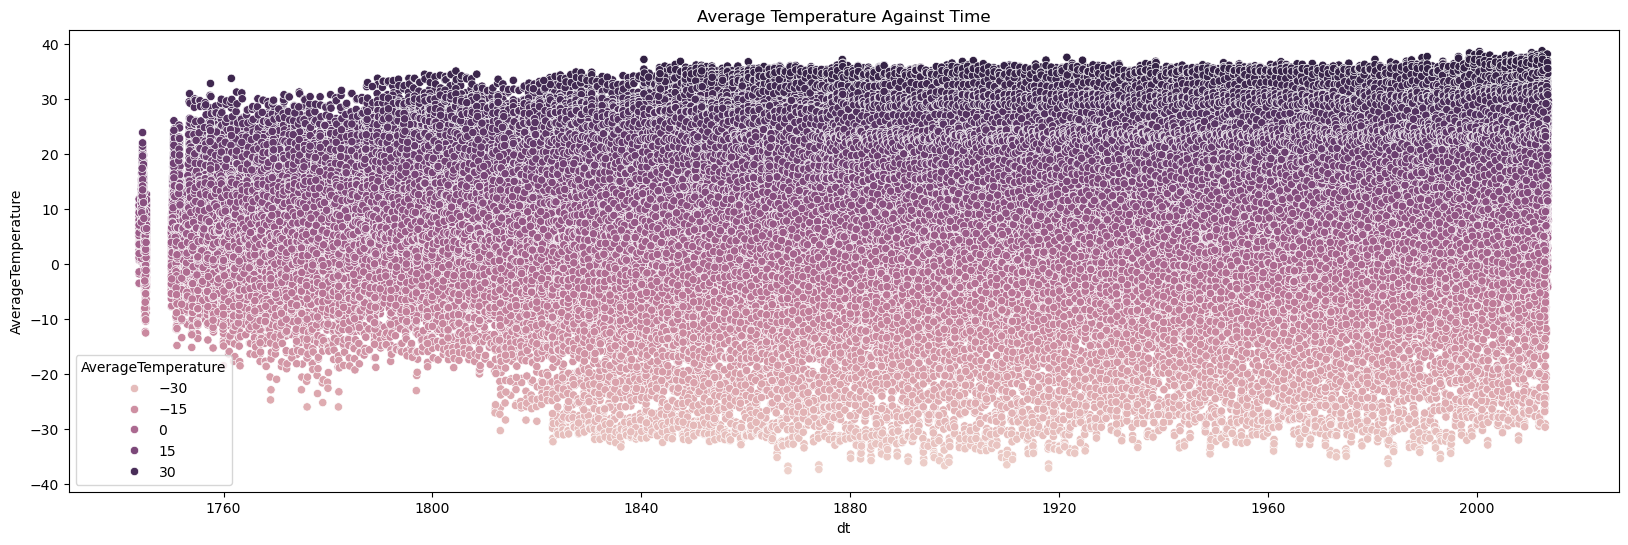

In [327]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='dt', y='AverageTemperature', hue='AverageTemperature', data=df_temperature)
plt.title("Average Temperature Against Time")
plt.show()

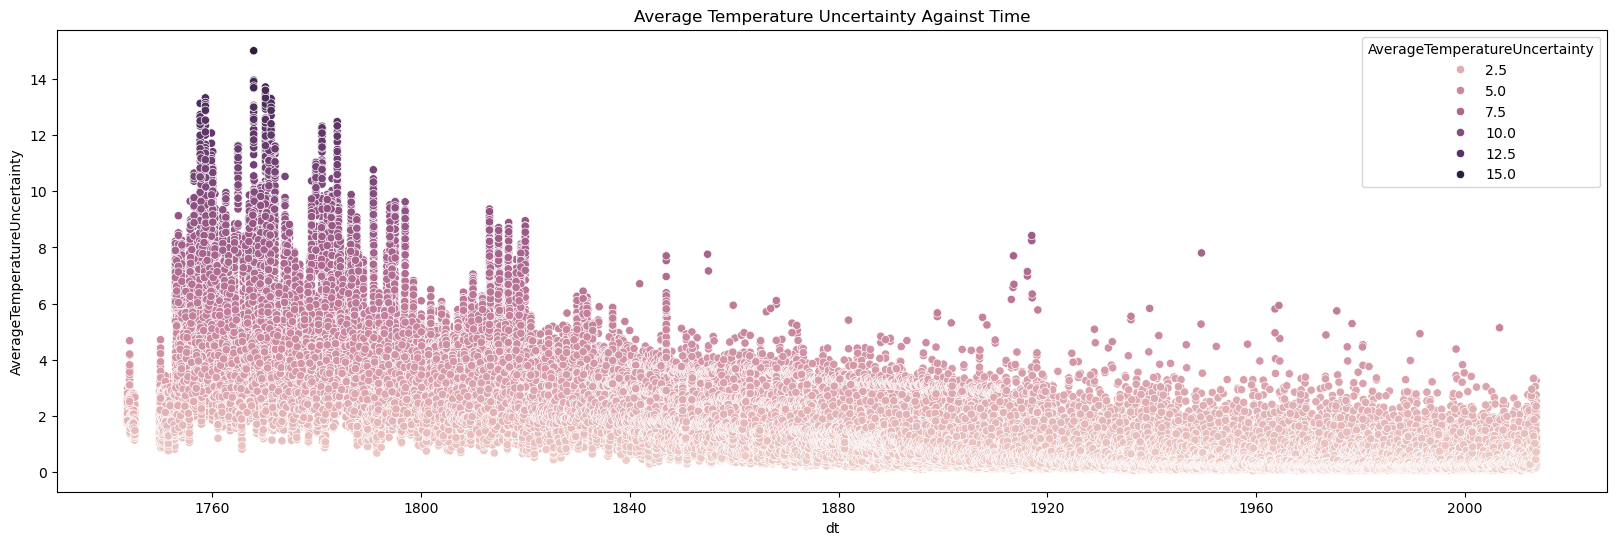

In [328]:

plt.figure(figsize=(20, 6))
sns.scatterplot(x='dt', y='AverageTemperatureUncertainty', hue='AverageTemperatureUncertainty', data=df_temperature)
plt.title("Average Temperature Uncertainty Against Time")
plt.show()

The plot above shows a clear decrease value in "AverateTemperatureUncertainty" over years, consistence with the inforamtion given that the mechanisms to collect data over year has improve the accuracy and therefore the uncertainty value is decreasing, making the recent data to be more reliable. 

#### The missing average temperature values can be handled in 3 ways: <br>
1. Fill in the missing using the average temperature of neighbouring records<br>
2. Fill in the missing temperature using the previous year record, or subsequent year record.<br>
3. Completely discard the missing record<br>
<br>
Option 1 doesn't quite work because we can see from above sample that there  are missing data over continuous months<br>
Option 2 is possible and it is not unreasonable, especially when our purpose is to look at the trending, and since there are a lot of records here we are very likely be taking a lot of average value. However it there were data missing for consecutive months for the same country, and there were data missing for the same month, same  country, over consequtive years. In addition, there are total 500K records in this dataset and if we were to iterate the data multiple times to fill the missing values through referencing historical record / future record, it will take too much time to iterate.  <br>
Option 3 is also possible, but let's consider the justification beloW: 

1. Firstly, the purpose of this project is to examine the relationship between global temperature versus rising sea level and changes to the sea ice size. The datset available for Sea Ice only data back to 1978, so there isn't any values if we were to keep data that is in 18th or 19th centuries. 

2. Secondly, the 'Uncertainty' column is telling us that data collected in recent years are more reliable, so ommitting the less reliable result seems reasonable.

3. Thirdly, given the reasoning written in option 2, it is taking too much effor to fill in the missing data using option 2 method, while it does not provide much value for this project given the justfication above.

With this we will <u><b>truncate the data up till 1970</b></u>

The following is the code to achive this: 

In [329]:

# Filter out records where 'date' is before 1970
df_temperature = df_temperature[df_temperature['dt'] >= '1970-01-01']

df_temperature.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country  \
2714 1970-01-01              -6.495                          0.584   Åland   
2715 1970-02-01             -10.835                          0.478   Åland   
2716 1970-03-01              -1.583                          0.608   Åland   
2717 1970-04-01               0.493                          0.463   Åland   
2718 1970-05-01               6.939                          0.565   Åland   

      Tyear  
2714   1970  
2715   1970  
2716   1970  
2717   1970  
2718   1970

#### At this point we also remove data from 2013 because that's not a full year data and would otherwise skew the annual average due to seasonal temperature change

In [330]:
# Filter out records where 'date' is before 1970
df_temperature = df_temperature[df_temperature['dt'] < '2013-01-01']

#### Let's look at null data distribution again

In [331]:
data = df_temperature [ df_temperature.isnull().any(axis=1) ] 
print(data.head)
print(data.tail)

<bound method NDFrame.head of               dt  AverageTemperature  AverageTemperatureUncertainty  \
22664 1970-01-01                 NaN                          0.800   
22665 1970-02-01                 NaN                          0.744   
22666 1970-03-01                 NaN                          1.101   
22667 1970-04-01                 NaN                          1.184   
22668 1970-05-01                 NaN                          1.025   
...          ...                 ...                            ...   
23175 2012-08-01                 NaN                          1.034   
23176 2012-09-01                 NaN                          0.685   
23177 2012-10-01                 NaN                          0.983   
23178 2012-11-01                 NaN                          0.505   
23179 2012-12-01                 NaN                          0.604   

          Country  Tyear  
22664  Antarctica   1970  
22665  Antarctica   1970  
22666  Antarctica   1970  
22667  An

In [332]:
# Extract the year from 'dt' column
df_temperature['Tyear'] = df_temperature['dt'].dt.year

# Count null values in 'val1' and 'val2' by year
null_counts_by_year = df_temperature.groupby('Tyear')[['AverageTemperature', 'AverageTemperatureUncertainty']].apply(lambda x: x.isnull().sum())

# Display the result
print(null_counts_by_year.head(10))
print(null_counts_by_year.tail(10))

       AverageTemperature  AverageTemperatureUncertainty
Tyear                                                   
1970                   12                              0
1971                   12                              0
1972                   12                              0
1973                   12                              0
1974                   12                              0
1975                   12                              0
1976                   12                              0
1977                   12                              0
1978                   12                              0
1979                   12                              0
       AverageTemperature  AverageTemperatureUncertainty
Tyear                                                   
2003                   12                              0
2004                   12                              0
2005                   12                              0
2006                   12      

#### Now we trying to fill the null value using the option 2 ways, fill with previous year data , or fill with following year data

In [333]:
# This section is marked raw
#
# This code is not used anymore since replacing null value from the previous year or current year is n
# not always possible without sufficient iteration, and it takes a long time to iterate 500K records 
# 
# 
# Lets define a function to return the temperature values from the past year
# input is 'dt' column and 'Country'
def fill_missing_with_previous_year(df, row_idx, col):
    # Get the current row's date and Country
    current_date = df.loc[row_idx, 'dt']
    current_country = df.loc[row_idx, 'Country']
    
    # Calculate the previous year's date
    prev_year_date = current_date - pd.DateOffset(years=1)
    next_year_date = current_date + pd.DateOffset(years=1)
    
     # Attempt to retrieve the previous year's record
    prev_year_record = df[(df['dt'] == prev_year_date) & (df['Country'] == current_country)]
    
    # If previous year's data is available and not NaN, use it
    if not prev_year_record.empty and not pd.isna(prev_year_record.iloc[0][col]):
        return prev_year_record.iloc[0][col]
    
    # If previous year's data is NaN or missing, attempt to retrieve the next year's record
    next_year_record = df[(df['dt'] == next_year_date) & (df['Country'] == current_country)]
    
    # If next year's data is available, use it; otherwise, return NaN
    if not next_year_record.empty and not pd.isna(next_year_record.iloc[0][col]):
        return next_year_record.iloc[0][col]
    
    # If neither previous nor next year's data is available, return NaN
    return np.nan

#
# for completeness purpose let's iterate this 3 time to completely fill the data
#
for iteration in range(1,4):
    for index, row in df_temperature.iterrows():
        if pd.isna(row['AverageTemperature']):
            df_temperature.at[index, 'AverageTemperature'] = fill_missing_with_previous_year(df_temperature, index, 'AverageTemperature')
            #print(index, "\t AverageTemperatureUncertainty \t", df_temperature.at[index, 'AverageTemperature', 'Country'] )
        if pd.isna(row['AverageTemperatureUncertainty']):
            df_temperature.at[index, 'AverageTemperatureUncertainty'] = fill_missing_with_previous_year(df_temperature, index, 'AverageTemperatureUncertainty')
            #print(index, "\t AverageTemperatureUncertainty\t ", df_temperature.at[index, 'AverageTemperatureUncertainty', 'Country'])


In [334]:
# Count null values in 'AverageTemperature' and 'AverageTemperatureUncertainty' by year
null_counts_by_year = df_temperature.groupby('Tyear')[['AverageTemperature', 'AverageTemperatureUncertainty']].apply(lambda x: x.isnull().sum())

# Display the result
print(null_counts_by_year.head(10))
print(null_counts_by_year.tail(10))

       AverageTemperature  AverageTemperatureUncertainty
Tyear                                                   
1970                   12                              0
1971                   12                              0
1972                   12                              0
1973                   12                              0
1974                   12                              0
1975                   12                              0
1976                   12                              0
1977                   12                              0
1978                   12                              0
1979                   12                              0
       AverageTemperature  AverageTemperatureUncertainty
Tyear                                                   
2003                   12                              0
2004                   12                              0
2005                   12                              0
2006                   12      

#### In total after we iterate the above 3 times, most of the null values were removed but some still remains.

In [335]:
data = df_temperature [ df_temperature.isnull().any(axis=1) ] 
print(data[['dt', 'Country']].head())
print(data[['dt', 'Country']].tail())
print("\nCoutries that still have null data: ", data['Country'].unique())


              dt     Country
22664 1970-01-01  Antarctica
22665 1970-02-01  Antarctica
22666 1970-03-01  Antarctica
22667 1970-04-01  Antarctica
22668 1970-05-01  Antarctica
              dt     Country
23175 2012-08-01  Antarctica
23176 2012-09-01  Antarctica
23177 2012-10-01  Antarctica
23178 2012-11-01  Antarctica
23179 2012-12-01  Antarctica

Coutries that still have null data:  ['Antarctica']


#### Since all data for Antarctica data is missing, and this is just 1 out of 243 "countries", we can drop this data from our analysis

In [336]:
df_temperature = df_temperature[df_temperature['Country'] != 'Antarctica']
print('Total countries in record = ', df_temperature['Country'].nunique())

Total countries in record =  242


In [337]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124872 entries, 2714 to 577452
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             124872 non-null  datetime64[ns]
 1   AverageTemperature             124872 non-null  float64       
 2   AverageTemperatureUncertainty  124872 non-null  float64       
 3   Country                        124872 non-null  object        
 4   Tyear                          124872 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 5.2+ MB


### By now we have completed the clean up for Global Average Land Temperature dataset.

#### Let's try to plot the graph based on monthly global average

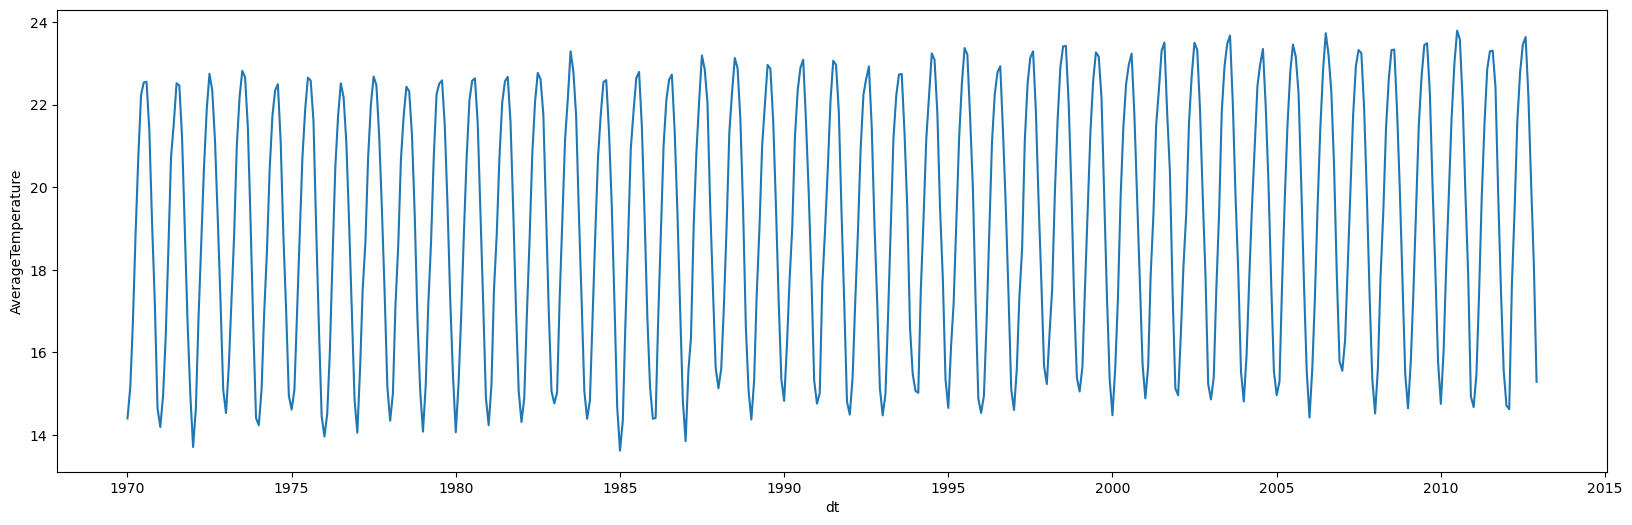

In [338]:
## Let's plot everything and see how it look like

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_temperature.groupby('dt')['AverageTemperature'].mean())
plt.show()

In [339]:
df_temperature.groupby('dt')['AverageTemperature'].mean()

dt
1970-01-01    14.402074
1970-02-01    15.155401
1970-03-01    16.664855
1970-04-01    18.858351
1970-05-01    20.708442
                ...    
2012-08-01    23.636789
2012-09-01    22.206306
2012-10-01    20.133950
2012-11-01    18.103921
2012-12-01    15.289136
Name: AverageTemperature, Length: 516, dtype: float64

#### Comment: 
The monthly average is calculated based on data for all countries within that month. It is easily understood that the temperature goes up and down due to relative position of earth to the sun and therefore we are seeing smooth pattern this way, oscilating within a small range - summer high temperature in north hemisphere is cancelled out by winter low temperature in the south. 

If we were to look at the yearly average perhaps it would not look so busy but provide a clearer trend.

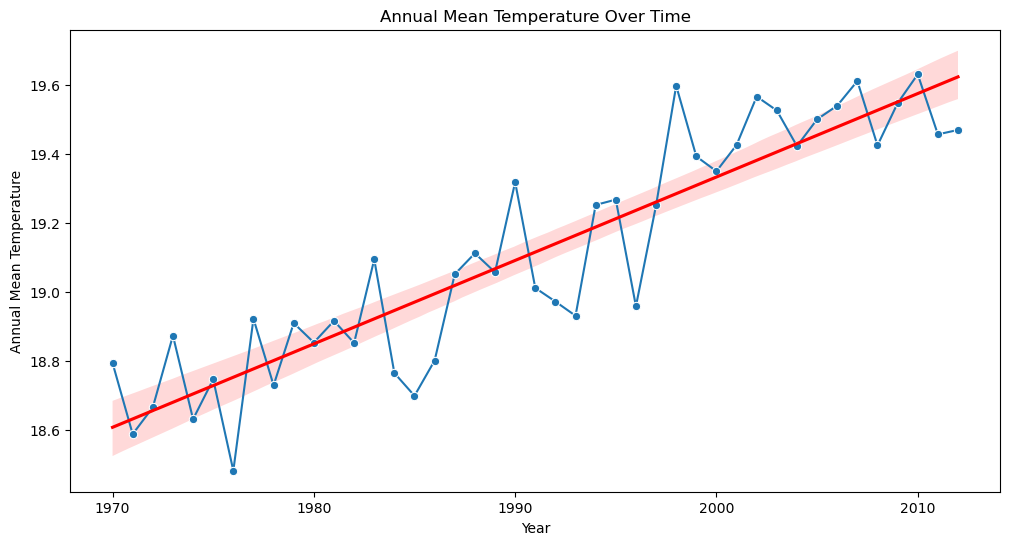

In [340]:
# Group by 'Tyear' and calculate the mean temperature for each year
df_annual_mean_temp = df_temperature.groupby('Tyear')['AverageTemperature'].mean().reset_index()

# Plot the annual mean temperature
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tyear', y='AverageTemperature', data=df_annual_mean_temp, marker="o")

# Add a regression line using sns.regplot
sns.regplot(x='Tyear', y='AverageTemperature', data=df_annual_mean_temp, scatter=False, color="red", line_kws={"label": "Trend Line"})

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Annual Mean Temperature")
plt.title("Annual Mean Temperature Over Time")

# Display the plot
plt.show()


#### Let's plot a diagram of a few countries closer to artic circle to see how their temperature change



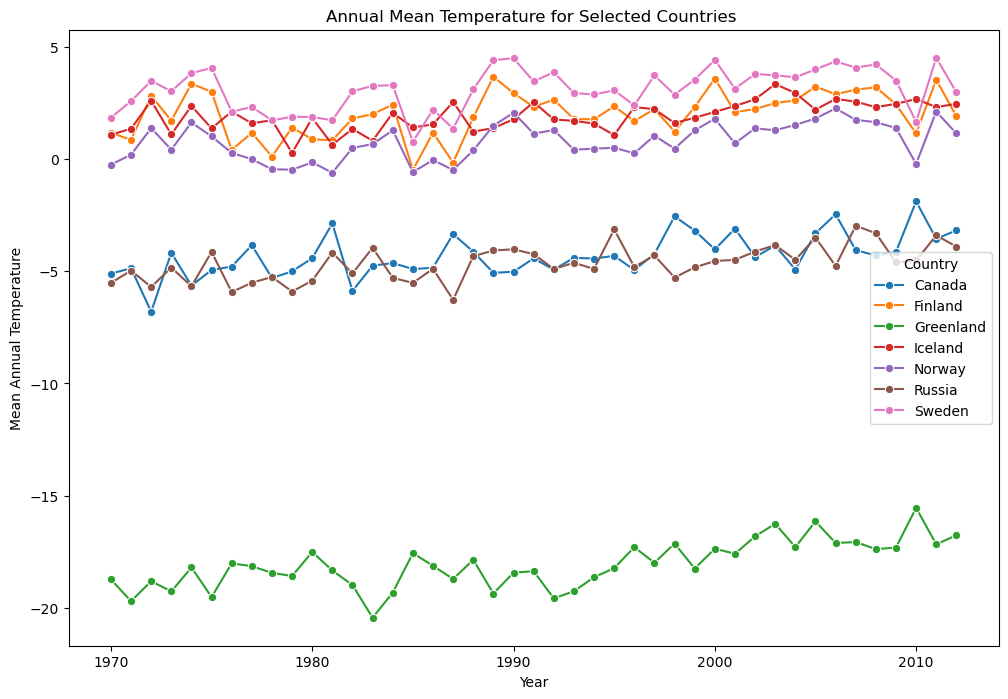

In [341]:
# Define the list of countries
countries = ['Finland', 'Norway', "Sweden", 'Iceland', 'Russia', 'Canada', 'Greenland'] 

# Filter the DataFrame to include only the specified countries
df_selected_countries = df_temperature[df_temperature['Country'].isin(countries)]

# Group by 'Tyear' and 'Country', then calculate the mean temperature for each group
df_mean_temp = df_selected_countries.groupby(['Tyear', 'Country'])['AverageTemperature'].mean().reset_index()

# Plot the mean annual temperature for each country
plt.figure(figsize=(12, 8))
sns.lineplot(x='Tyear', y='AverageTemperature', hue='Country', data=df_mean_temp, marker="o")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Mean Annual Temperature")
plt.title("Annual Mean Temperature for Selected Countries ")

# Show the plot
plt.show()

#### Let's plot each of these graph against the regression line

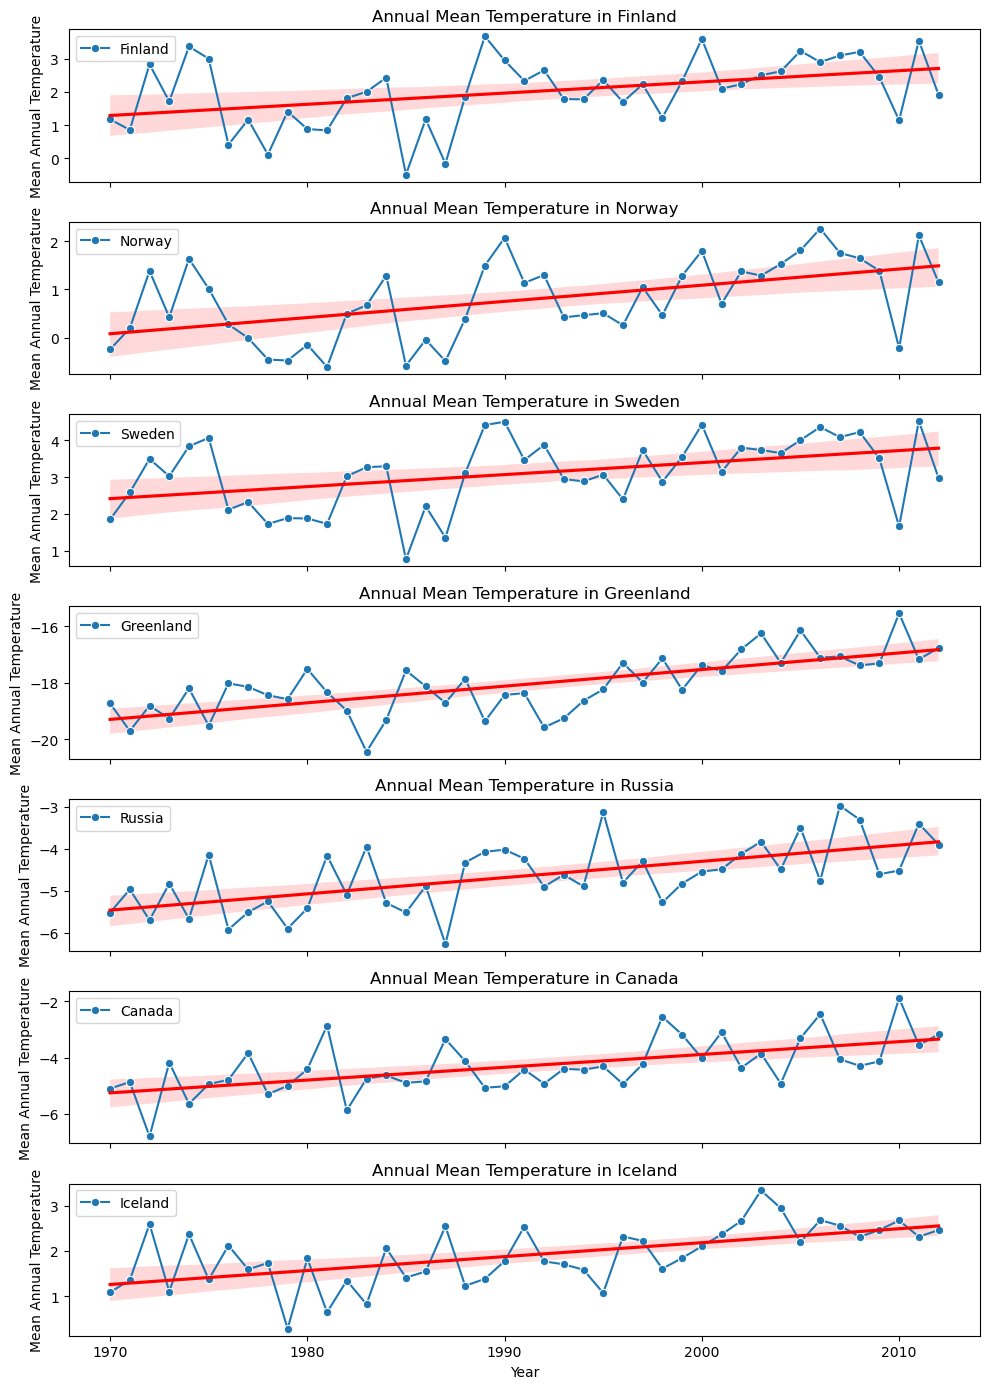

In [342]:
# Updated list of countries
countries = ['Finland', 'Norway', 'Sweden', 'Greenland', 'Russia', 'Canada', 'Iceland']

# Filter the DataFrame to include only the specified countries
df_selected_countries = df_temperature[df_temperature['Country'].isin(countries)]

# Group by 'Tyear' and 'Country', then calculate the mean temperature for each group
df_mean_temp = df_selected_countries.groupby(['Tyear', 'Country'])['AverageTemperature'].mean().reset_index()

# Set up the subplots
num_countries = len(countries)
fig, axes = plt.subplots(num_countries, 1, figsize=(10, 2 * num_countries), sharex=True)

# Loop through each country and create a line plot and regression line in each subplot
for i, country in enumerate(countries):
    country_data = df_mean_temp[df_mean_temp['Country'] == country]
    
    # Line plot for the mean temperature
    sns.lineplot(ax=axes[i], x='Tyear', y='AverageTemperature', data=country_data, marker="o", label=country)
    
    # Regression line
    sns.regplot(ax=axes[i], x='Tyear', y='AverageTemperature', data=country_data, scatter=False, color="red", line_kws={"label": "Trend line"})
    
    # Set titles and labels
    axes[i].set_title(f"Annual Mean Temperature in {country}")
    axes[i].set_ylabel("Mean Annual Temperature")
    axes[i].legend()

# Set the x-axis label only once at the bottom
axes[-1].set_xlabel("Year")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


It is very clear that the temperature has been rising over time, whether you look at data per country or global average. 

# Dataset 2: Sea Ice Extend (size) dataset <br>

In [343]:
df_ice.head()

Year   Month   Day       Extent      Missing  \
0  1978      10    26       10.231          0.0   
1  1978      10    28       10.420          0.0   
2  1978      10    30       10.557          0.0   
3  1978      11     1       10.670          0.0   
4  1978      11     3       10.777          0.0   

                                         Source Data hemisphere  
0   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
1   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
2   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
3   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
4   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north

In [344]:
df_ice.tail()

Year   Month   Day       Extent      Missing  \
26349  2019       5    27       10.085          0.0   
26350  2019       5    28       10.078          0.0   
26351  2019       5    29       10.219          0.0   
26352  2019       5    30       10.363          0.0   
26353  2019       5    31       10.436          0.0   

                                             Source Data hemisphere  
26349  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  
26350  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  
26351  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  
26352  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south  
26353  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south

In [345]:
df_ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26354 entries, 0 to 26353
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          26354 non-null  int64  
 1    Month        26354 non-null  int64  
 2    Day          26354 non-null  int64  
 3        Extent   26354 non-null  float64
 4       Missing   26354 non-null  float64
 5    Source Data  26354 non-null  object 
 6   hemisphere    26354 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB


In [346]:
df_ice.describe()

Year         Month           Day        Extent       Missing
count  26354.000000  26354.000000  26354.000000  26354.000000  26354.000000
mean    2000.591941      6.507399     15.740685     11.494986      0.000003
std       10.896821      3.451938      8.801607      4.611734      0.000227
min     1978.000000      1.000000      1.000000      2.080000      0.000000
25%     1992.000000      4.000000      8.000000      7.601000      0.000000
50%     2001.000000      7.000000     16.000000     12.217000      0.000000
75%     2010.000000     10.000000     23.000000     15.114000      0.000000
max     2019.000000     12.000000     31.000000     20.201000      0.024000

In [347]:
df_ice.keys()

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data',
       'hemisphere'],
      dtype='object')

In [348]:
df_ice['hemisphere'].unique()

array(['north', 'south'], dtype=object)

#### Comment:
1. The data was recorded from October 1978 to May 2019. The reading was taken every other day initially, but later recorded on daily basis. 
2. The dataset has no null value <br>
3. The keys has got unnecessary space added. <br>
4. The data is consists of 2 main categories, North hemisphere data and South hemisphere data, worth examining them seperately.
5. Also, missing ice data is very small and could be difficult to visualise. 

#### Clean up the Keys 

In [349]:
df_ice.rename(columns=lambda x: x.strip(), inplace=True)
df_ice.keys()

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data',
       'hemisphere'],
      dtype='object')

####  Add Time (date) column similar to the previous dataset

In [350]:
df_ice['Time'] = pd.to_datetime(df_ice[['Year', 'Month', 'Day']])
df_ice.tail()

Year  Month  Day  Extent  Missing  \
26349  2019      5   27  10.085      0.0   
26350  2019      5   28  10.078      0.0   
26351  2019      5   29  10.219      0.0   
26352  2019      5   30  10.363      0.0   
26353  2019      5   31  10.436      0.0   

                                             Source Data hemisphere       Time  
26349  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south 2019-05-27  
26350  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south 2019-05-28  
26351  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south 2019-05-29  
26352  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south 2019-05-30  
26353  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      south 2019-05-31

#### Remove data final year data as incomplete final year data skew the annual average

In [351]:
df_ice = df_ice [ df_ice['Year'] < 2019]

#### Let's plot a graph to see how the dataset look like

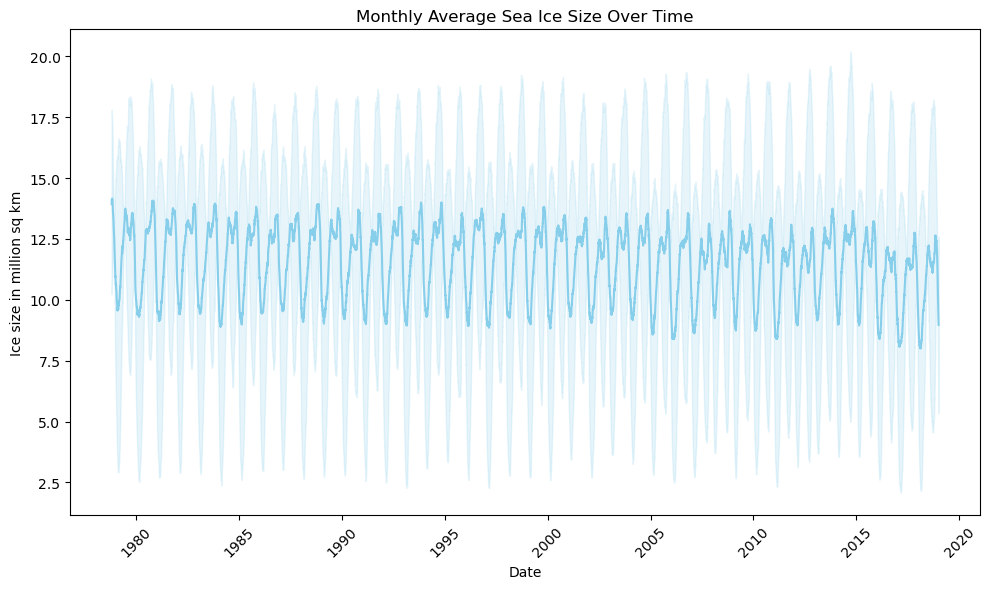

In [352]:

plt.figure(figsize=(10, 6))
#sns.lineplot(x='Time', y='Extent', data=jul_ice_data, marker='o', color='skyblue',orient='x')
sns.lineplot(x='Time', y='Extent', data=df_ice, color='skyblue')

plt.xticks(rotation=45)  # Rotate date labels for readability
plt.title('Monthly Average Sea Ice Size Over Time')
plt.xlabel('Date')
plt.ylabel('Ice size in million sq km')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

#### The Sea Ice data is also collected based on North Hemisphere and South Hemisphere. 

#### Plot the average sea ice extend based on north and south hemisphere respectively. 

In [353]:
df_ice_north = df_ice[ df_ice['hemisphere'] == 'north'] 
df_ice_south = df_ice[ df_ice['hemisphere'] == 'south'] 
df_annual_mean_ice_north = df_ice_north.groupby('Year')['Extent'].mean().reset_index()
df_annual_mean_ice_south= df_ice_south.groupby('Year')['Extent'].mean().reset_index()
df_monthly_mean_ice_north = df_ice_north.groupby(['Year','Month'])['Extent'].mean().reset_index()
df_monthly_mean_ice_south= df_ice_south.groupby(['Year','Month'])['Extent'].mean().reset_index()

In [354]:
print(df_monthly_mean_ice_north)

     Year  Month     Extent
0    1978     10  10.402667
1    1978     11  11.645133
2    1978     12  13.667063
3    1979      1  15.414000
4    1979      2  16.175286
..    ...    ...        ...
478  2018      8   5.607935
479  2018      9   4.713600
480  2018     10   6.063484
481  2018     11   9.804700
482  2018     12  11.856516

[483 rows x 3 columns]


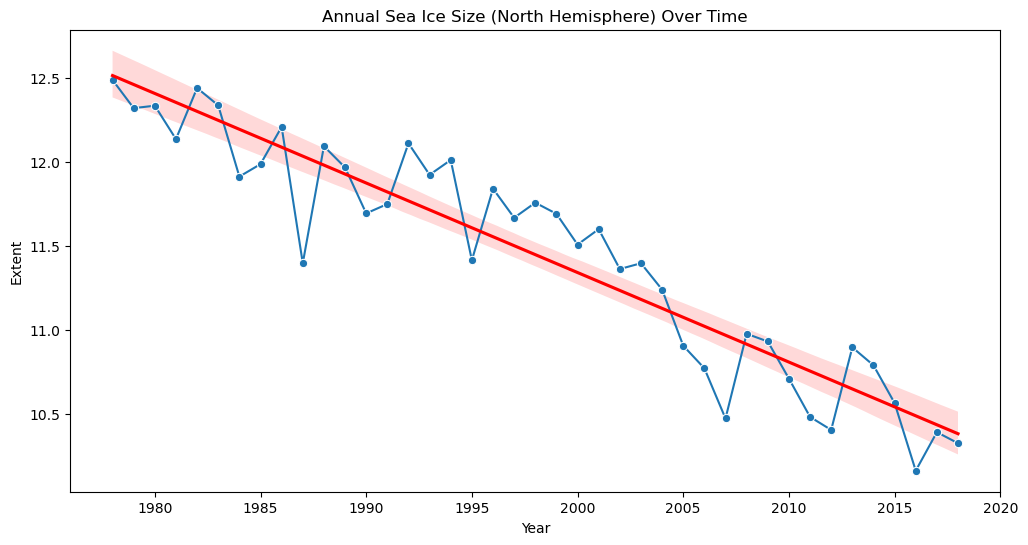

In [355]:

plt.figure(figsize=(12, 6))
#sns.lineplot(data=df_ice_north.groupby('Year')['Extent'].mean())
sns.lineplot(x='Year', y='Extent', data=df_annual_mean_ice_north, marker="o")
sns.regplot(x='Year', y='Extent', data=df_annual_mean_ice_north, scatter=False, color="red", line_kws={"label": "Trend Line"})
plt.title("Annual Sea Ice Size (North Hemisphere) Over Time")
plt.show()

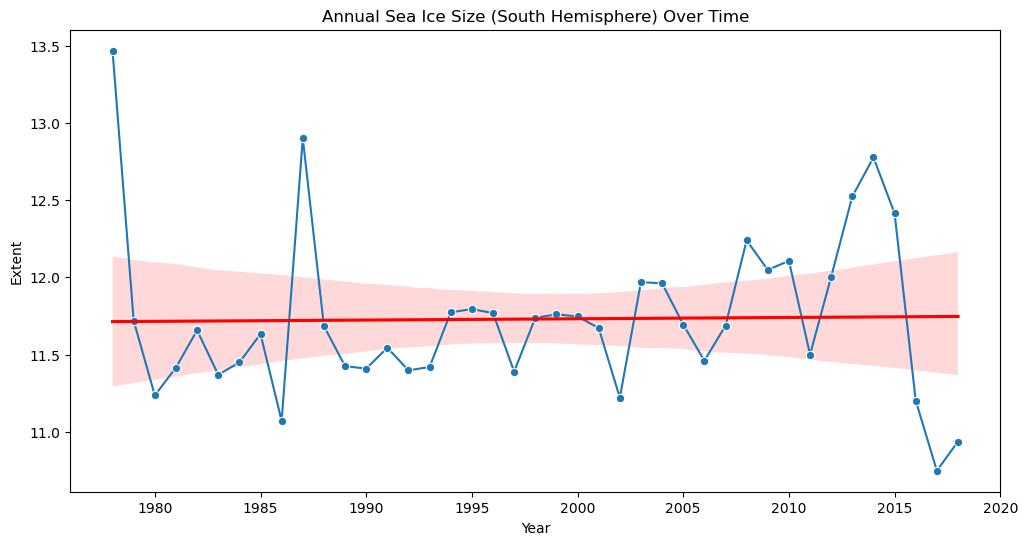

In [356]:
plt.figure(figsize=(12, 6))
#sns.lineplot(data=df_ice_south.groupby('Year')['Extent'].mean())
sns.lineplot(x='Year', y='Extent', data=df_annual_mean_ice_south, marker="o")
sns.regplot(x='Year', y='Extent', data=df_annual_mean_ice_south, scatter=False, color="red", line_kws={"label": "Trend Line"})
plt.title("Annual Sea Ice Size (South Hemisphere) Over Time")
plt.show()

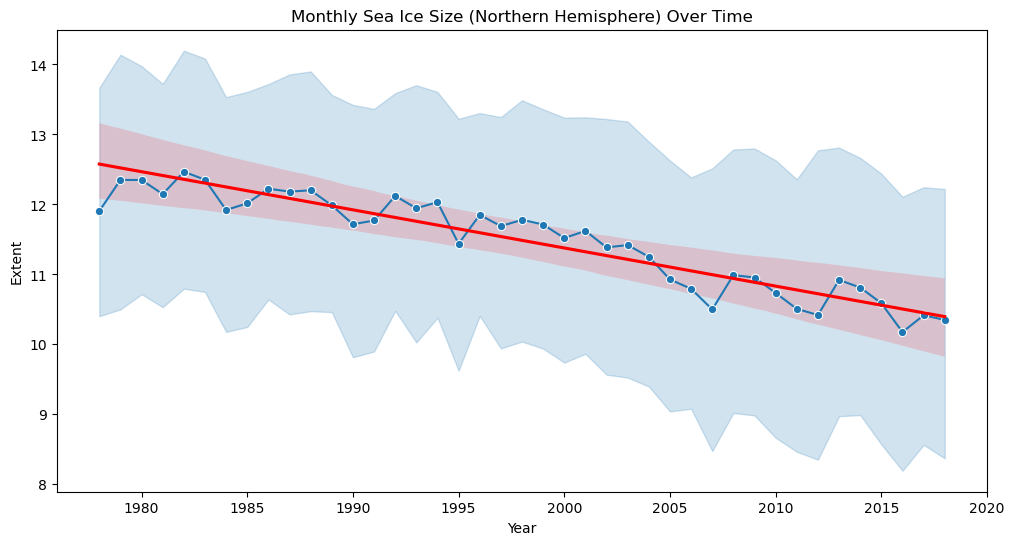

In [357]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Extent', data=df_monthly_mean_ice_north, marker="o")
sns.regplot(x='Year', y='Extent', data=df_monthly_mean_ice_north, scatter=False, color="red", line_kws={"label": "Trend Line"})
plt.title("Monthly Sea Ice Size (Northern Hemisphere) Over Time")
plt.show()

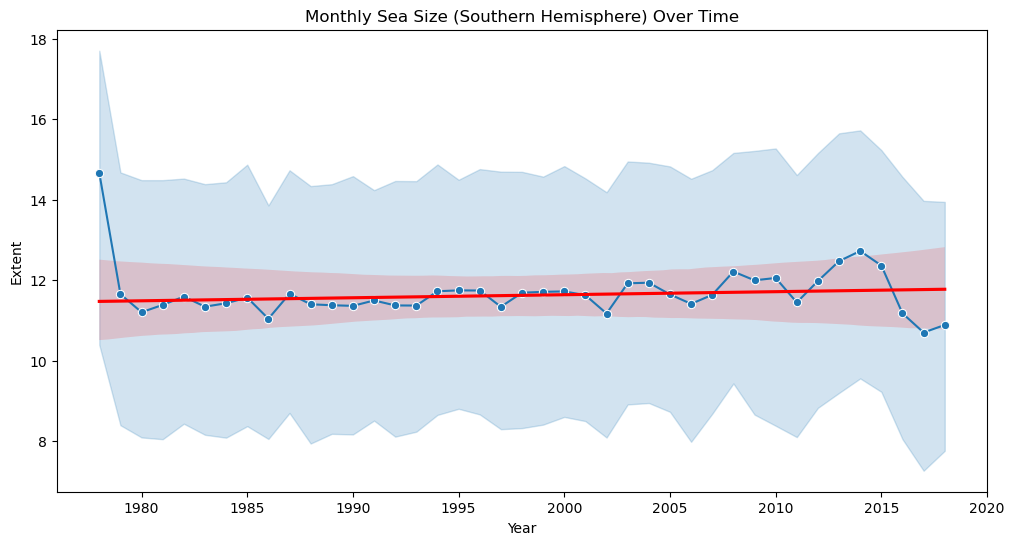

In [358]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Extent', data=df_monthly_mean_ice_south, marker="o")
sns.regplot(x='Year', y='Extent', data=df_monthly_mean_ice_south, scatter=False, color="red", line_kws={"label": "Trend Line"})
plt.title("Monthly Sea Size (Southern Hemisphere) Over Time")
plt.show()

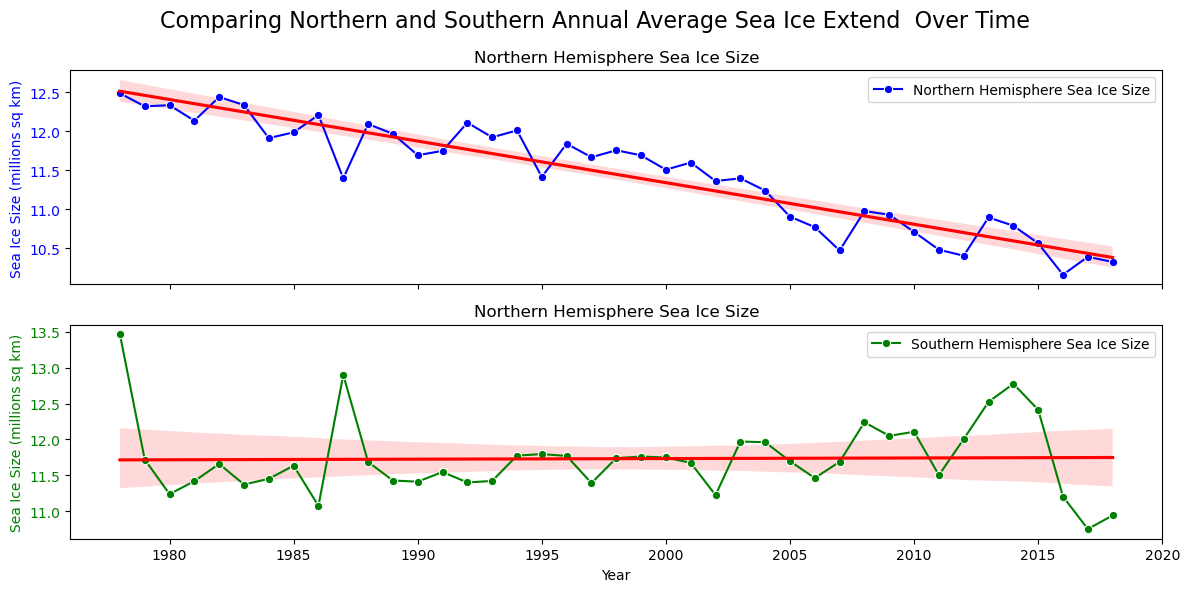

In [359]:
# Create two subplots of Sea Ice Size: one for Northern and one for Southern Hempisphere
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Plot the Northern Hemisphere Annual Average Sea Ice size on the first subplot (ax1)
sns.lineplot(x='Year', y='Extent', data=df_annual_mean_ice_north, label='Northern Hemisphere Sea Ice Size', marker="o", color="blue", ax=ax1)
sns.regplot(x='Year', y='Extent', data=df_annual_mean_ice_north, scatter=False, color="red", line_kws={"label": "Trend Line"}, ax=ax1)
ax1.set_ylabel("Sea Ice Size (millions sq km)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title("Northern Hemisphere Sea Ice Size")

# Plot the GMSL on the second subplot (ax2)
sns.lineplot(x='Year', y='Extent', data=df_annual_mean_ice_south, label='Southern Hemisphere Sea Ice Size', marker="o", color="green", ax=ax2)
sns.regplot(x='Year', y='Extent', data=df_annual_mean_ice_south, scatter=False, color="red", line_kws={"label": "Trend Line"},ax=ax2)
ax2.set_xlabel("Year")
ax2.set_ylabel("Sea Ice Size (millions sq km)", color="green")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_title("Northern Hemisphere Sea Ice Size")

# Add a main title for the entire figure
plt.suptitle("Comparing Northern and Southern Annual Average Sea Ice Extend  Over Time", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


### Observation
From the chart above we see that the average Sea Ice Extent decreases over time in northern hemisphere but increases over time in southern hemisphere. The increase in sea ice extent in the sothern hemisphere (Antarctica) was unexpected by the layman. This is a bit unexpected and we need to investigate further why this is happening.

The reason behind is complicated and also due to the non-linearity of the atmostphere effect. The easiest way to look at this is start from the Thinning Ozone Layer problem:
   - The Ozone Layer is thining centered above Antarctica
   - This leads to cooling of the stratosphere layer, which intensifies the polar vortex - a large area of low-pressure, cold air that circulates around Antarctica. 
   - This cooler, more stable atmosphere results in stronger and more persistent westerly winds around the continent, which, in turn, push sea ice outward, allowing it to spread over a larger area.
   - The ozone depletion leads to colder temperatures in the lower atmosphere, encouraging sea ice formation.
     

# Dataset 3: Global Mean Sea Level Data <br>

In [360]:
df_sea.head()

Time   GMSL  GMSL uncertainty
0  1880-01-15 -183.0              24.2
1  1880-02-15 -171.1              24.2
2  1880-03-15 -164.3              24.2
3  1880-04-15 -158.2              24.2
4  1880-05-15 -158.7              24.2

In [361]:
df_sea.tail()

Time  GMSL  GMSL uncertainty
1603  2013-08-15  71.6               8.8
1604  2013-09-15  68.8               8.8
1605  2013-10-15  66.4               8.9
1606  2013-11-15  59.7               9.0
1607  2013-12-15  58.5               9.0

In [362]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB


In [363]:
df_sea.describe()

GMSL  GMSL uncertainty
count  1608.000000        1608.00000
mean    -66.079540          11.29745
std      62.893171           5.27788
min    -184.500000           6.20000
25%    -117.100000           6.70000
50%     -74.000000          10.10000
75%     -15.375000          14.00000
max      82.400000          24.20000

In [364]:
print('Data type of \'dt\' column:', type(df_sea.iloc[0,0]))
df_sea['Time'] = pd.to_datetime(df_sea['Time'])
print('Data type for \'dt\' column is now', type(df_sea.iloc[0,0]))

Data type of 'dt' column: <class 'str'>
Data type for 'dt' column is now <class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Observation: 
The Sea Level data was recorded from Jan 1880 to December 2013 Since there is no null value there is no immediate treatment needed. However, to be consistent with the Global Average Land Temperature dataset, let's keep only data after 1970. We dont need to truncate the final year data (2013) because the data was recorded until 2013. <br>

In [365]:
# Filter out records where 'date' is before 1970
df_sea = df_sea[df_sea['Time'] >= '1970-01-01']

print(df_sea)

           Time  GMSL  GMSL uncertainty
1080 1970-01-15 -38.8               7.0
1081 1970-02-15 -37.6               7.0
1082 1970-03-15 -38.2               7.0
1083 1970-04-15 -41.1               6.9
1084 1970-05-15 -41.3               6.9
...         ...   ...               ...
1603 2013-08-15  71.6               8.8
1604 2013-09-15  68.8               8.8
1605 2013-10-15  66.4               8.9
1606 2013-11-15  59.7               9.0
1607 2013-12-15  58.5               9.0

[528 rows x 3 columns]


#### Let's plot the annual mean sea level graph

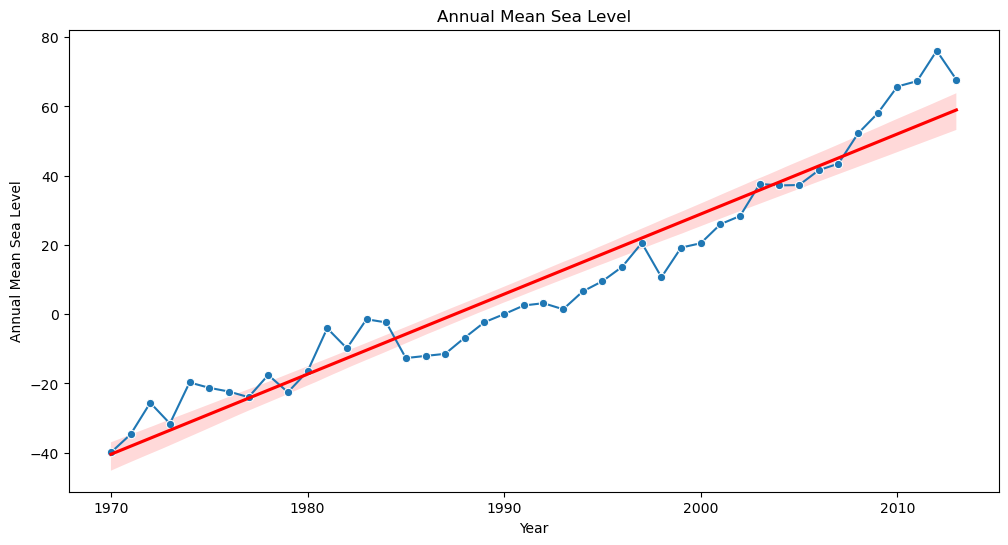

In [366]:
df_sea['Syear'] = df_sea['Time'].dt.year

# Group by 'Syear' and calculate the mean temperature for each year
df_annual_mean_sealevel = df_sea.groupby('Syear')['GMSL'].mean().reset_index()

# Plot the annual mean sea level
plt.figure(figsize=(12, 6))
sns.lineplot(x='Syear', y='GMSL', data=df_annual_mean_sealevel, marker="o")

# Add a regression line using sns.regplot
sns.regplot(x='Syear', y='GMSL', data=df_annual_mean_sealevel, scatter=False, color="red", line_kws={"label": "Trend Line"})

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Annual Mean Sea Level")
plt.title("Annual Mean Sea Level")

# Display the plot
plt.show()

#### Let's look at time-based plot using monthly average data instead

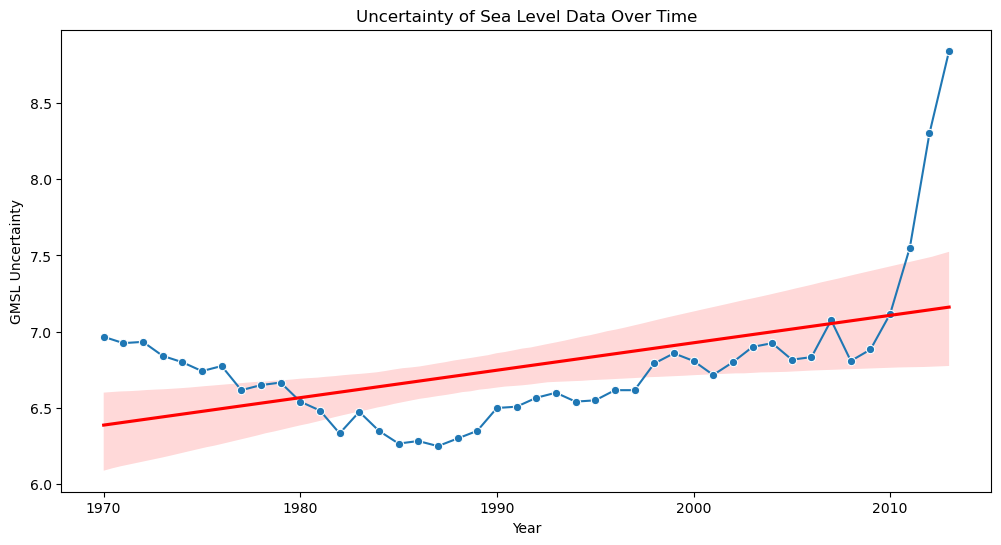

In [367]:
# Group by 'Syear' and calculate the mean temperature for each year
df_annual_mean_sealevel_uncertainty = df_sea.groupby('Syear')['GMSL uncertainty'].mean().reset_index()

# Plot the uncertainty graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Syear', y='GMSL uncertainty', data=df_annual_mean_sealevel_uncertainty, marker="o")

# Add a regression line using sns.regplot
sns.regplot(x='Syear', y='GMSL uncertainty', data=df_annual_mean_sealevel_uncertainty, scatter=False, color="red", line_kws={"label": "Trend Line"})

# Add labels and title
plt.xlabel("Year")
plt.ylabel("GMSL Uncertainty")
plt.title("Uncertainty of Sea Level Data Over Time")

# Display the plot
plt.show()

## Why is the "GMSL Uncertainty" increase?



The uncertainty level is expected to reduce overtime due to improved technic used in data collection. However in the immediate chart above, we see that the "GMSL Uncertainty" spike after 2010. This was unexpected and need further research, and the following provides the explanation. 

The increase in the "GMSL Uncertainty" (Global Mean Sea Level Uncertainty) after 2010 could be attributed to several factors, primarily related to how sea level data is collected, analyzed, and modeled. Here are some potential reasons:

### 1. Improved Data Resolution and Coverage
After 2010, satellite missions, such as the European Space Agency’s *CryoSat-2* and NASA’s *GRACE* missions, began providing higher-resolution data on ice sheets, ocean currents, and gravitational fields. This increase in data density can lead to better understanding of sea level dynamics but may also lead to increased reported uncertainty due to more complex, nuanced observations.

- **Higher spatial and temporal resolution**: The more detailed the data (e.g., finer time intervals, higher spatial accuracy), the more uncertainties may be captured and reported due to variability in measurements.
- **Complexity of data integration**: Combining data from different satellite missions and sources (e.g., tide gauges, satellite altimetry, and ocean models) can introduce more uncertainty as models evolve and uncertainties in different data sources accumulate.

### 2. Increased Contribution from Ice Sheets and Glaciers
Ice sheet dynamics, particularly in Greenland and Antarctica, have become a larger source of sea-level rise over the past few decades, with acceleration in ice mass loss being more pronounced post-2010. The behavior of these ice sheets is highly variable, and their contributions to sea level rise can have higher uncertainty.

- **Ice sheet mass loss**: Changes in ice mass loss due to changes in ice dynamics, melting, and calving introduce larger uncertainties in predicting future sea levels, which reflect in the uncertainty estimates.
- **Unpredictability**: Processes like ice sheet collapse or glacier flow are not fully understood and are difficult to model, leading to higher uncertainty.

### 3. Advances in Climate Modeling
As climate models become more sophisticated and include additional variables (e.g., climate change effects, ocean circulation, and land motion), the uncertainty associated with projections of sea-level rise also increases. More variables and feedback mechanisms can increase the uncertainty in predicting the exact amount of sea-level rise.

- **Model improvement**: As models become more detailed and integrate more complex processes, the uncertainty in these projections may be greater, especially if the inputs (such as ice sheet dynamics or ocean circulation patterns) are still not well constrained.
- **Feedback effects**: The increased complexity of how ocean warming affects sea levels, including the role of melting ice, thermal expansion, and ocean currents, can lead to higher uncertainty.

### 4. Regional Variability and Local Factors
After 2010, the consideration of regional sea level variability may have also increased uncertainty. For example, regional variations in sea level are affected by local factors such as vertical land movement, ocean currents, and gravitational effects, which can lead to more uncertainty when estimating global averages.

- **Vertical land motion**: Land subsidence or uplift can contribute to varying local sea levels, making global averages harder to pin down accurately, especially if models are accounting for this variability.
- **Ocean dynamics**: The role of ocean currents and water distribution around the globe can vary, increasing the uncertainty in measurements.

### 5. Rising Scientific and Public Interest
Since 2010, there has been a heightened focus on climate change and its impacts, including sea-level rise. As a result, more rigorous and transparent reporting of uncertainty has become standard practice, possibly reflecting an increase in both the quantity and quality of uncertainty quantification.

- **Transparency in uncertainty reporting**: The scientific community may have increased its focus on providing uncertainty estimates as a part of its normal modeling processes, reflecting a growing emphasis on explaining the variability in sea level projections.
<br>
### Conclusion
The increase in "GMSL Uncertainty" after 2010 can likely be attributed to the combination of improved data resolution, better modeling techniques, and the inclusion of more complex dynamics (e.g., ice sheets, ocean dynamics) that add both detail and uncertainty. As our understanding of sea level rise deepens, uncertainty estimates are more accurately reflecting the challenges in predicting future sea level changes.


### Now create a super impose diagram

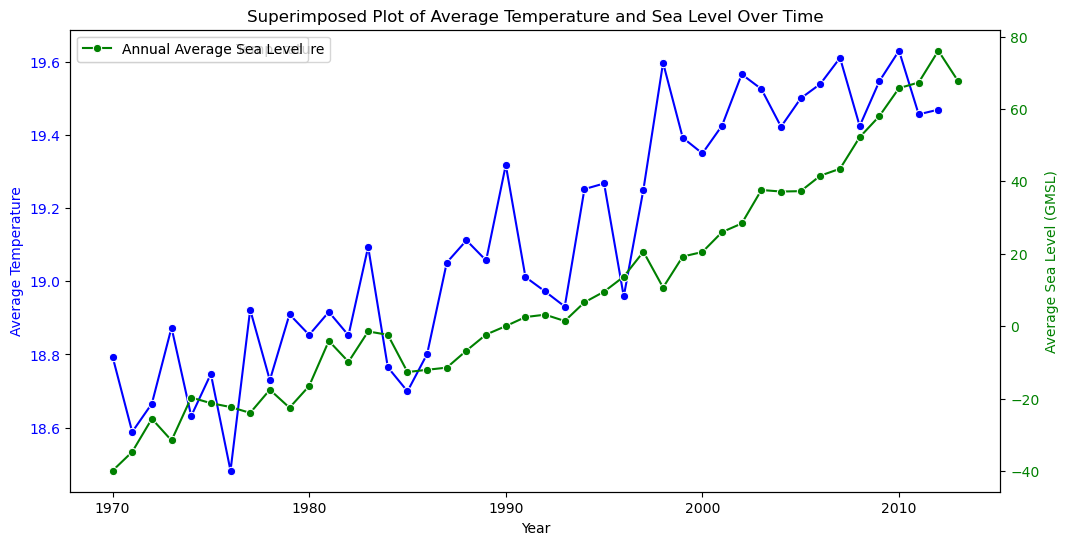

In [368]:
# Set up the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Average Temperature on the primary y-axis
sns.lineplot(x='Tyear', y='AverageTemperature', data=df_annual_mean_temp, label='Annual Average Temperature', marker="o", color="blue", ax=ax1)

# Set labels for the primary y-axis (Average Temperature)
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Temperature", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create the secondary y-axis for GMSL
ax2 = ax1.twinx()

# Plot the GMSL on the secondary y-axis
sns.lineplot(x='Syear', y='GMSL', data=df_annual_mean_sealevel, label='Annual Average Sea Level', marker="o", color="green", ax=ax2)

# Set labels for the secondary y-axis (GMSL)
ax2.set_ylabel("Average Sea Level (GMSL)", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Add a title and legend
plt.title("Superimposed Plot of Average Temperature and Sea Level Over Time")

# Display the plot
plt.show()

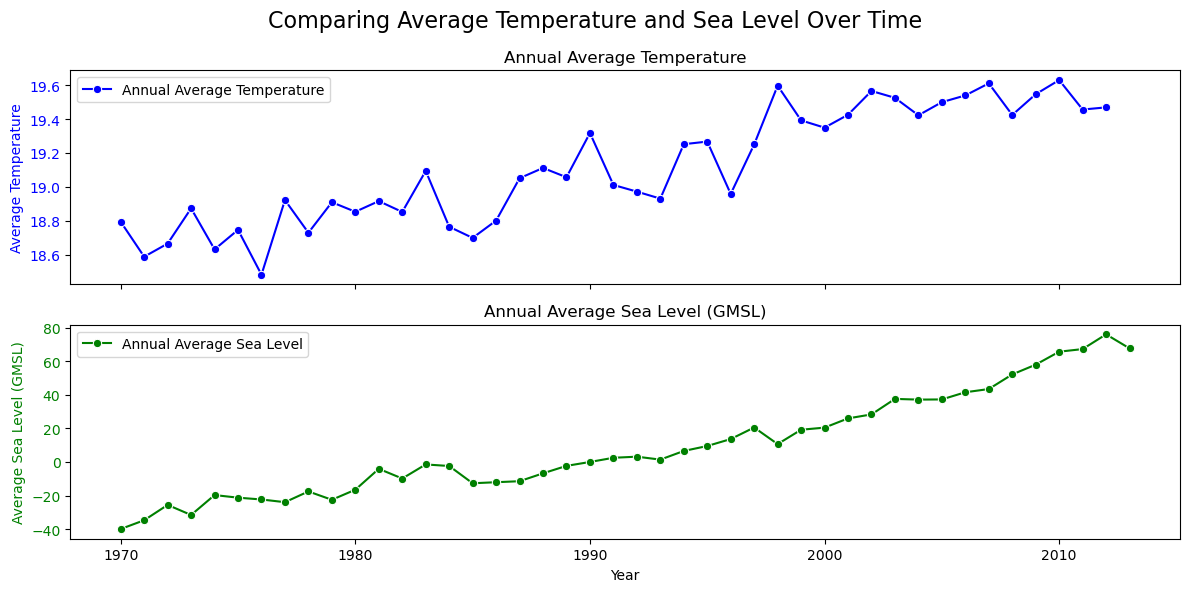

In [369]:

# Create two subplots: one for Average Temperature and one for GMSL
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Plot the Average Temperature on the first subplot (ax1)
sns.lineplot(x='Tyear', y='AverageTemperature', data=df_annual_mean_temp, label='Annual Average Temperature', marker="o", color="blue", ax=ax1)
ax1.set_ylabel("Average Temperature", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title("Annual Average Temperature")

# Plot the GMSL on the second subplot (ax2)
sns.lineplot(x='Syear', y='GMSL', data=df_annual_mean_sealevel, label='Annual Average Sea Level', marker="o", color="green", ax=ax2)
ax2.set_xlabel("Year")
ax2.set_ylabel("Average Sea Level (GMSL)", color="green")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_title("Annual Average Sea Level (GMSL)")

# Add a main title for the entire figure
plt.suptitle("Comparing Average Temperature and Sea Level Over Time", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


# Comparing 3 sets of data

#### Examining 3 graphs 

Now the purpose here is to super impose the 3 sets of data together and examining the trend and correlation among each other. 

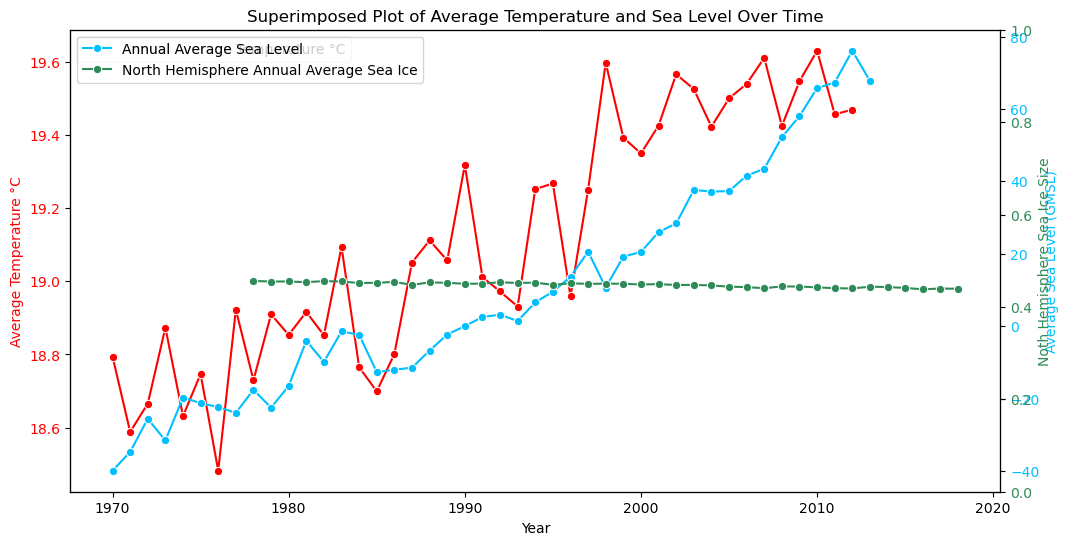

In [370]:
# Set up the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Average Temperature on the primary y-axis
sns.lineplot(x='Tyear', y='AverageTemperature', data=df_annual_mean_temp, label='Annual Average Temperature °C', marker="o", color="red", ax=ax1)

# Set labels for the primary y-axis (Average Temperature)
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Temperature °C", color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Create the secondary y-axis for GMSL
ax2 = ax1.twinx()

# Plot the GMSL on the secondary y-axis
sns.lineplot(x='Syear', y='GMSL', data=df_annual_mean_sealevel, label='Annual Average Sea Level', marker="o", color="deepskyblue", ax=ax2)

# Set labels for the secondary y-axis (GMSL)
ax2.set_ylabel("Average Sea Level (GMSL)", color="deepskyblue")
ax2.tick_params(axis='y', labelcolor="deepskyblue")

# Create the third y-axis for GMSL
ax3 = ax1.twinx()

# Plot the Sea Ice on the Third y-axis
sns.lineplot(x='Year', y='Extent', data=df_annual_mean_ice_north, label='North Hemisphere Annual Average Sea Ice', marker="o", color="seagreen", ax=ax2)

ax3.set_ylabel("Noth Hemisphere Sea Ice Size", color="seagreen")
ax3.tick_params(axis='y', labelcolor="seagreen")


# Add a title and legend
plt.title("Superimposed Plot of Average Temperature and Sea Level Over Time")

# Display the plot
plt.show()

#### Alternate drawing

The above technique learned was good for superimposing two graphs. But as as there are 3 graphs, we can see that the line legend on top left corner hide one of the line, the title for the 3rd y-axis overlapped with the 2nd y-axis. 
In addition, we can see that the 3rd, purple colored line is too flat to see a clear trend, this is due to the difference in the magnitude of data, relative to the other 2 lines. 
With the help and hints given by the instructor, a better chart was drawn below using these techniques:
1. Use the ax1.set_ylim method to manipulate the range for each axis. This technique achieves two objectives:<br>
   - Allow us to show the trend better by amplifying the magnitude of the y-axis which appeared to be a horizontal line
   - Allow us to seperate line better for better visualisation, yet can still compare the trending correlation. 
2. Use the ax1.legend(loc="upper left") method to place the line legend at different part of the diagram for better visibility
3. Use the "ax3.spines['right'].set_position(('outward', 60))" method to provide a clear offset for the 3rd y-axis label for better presentation.  

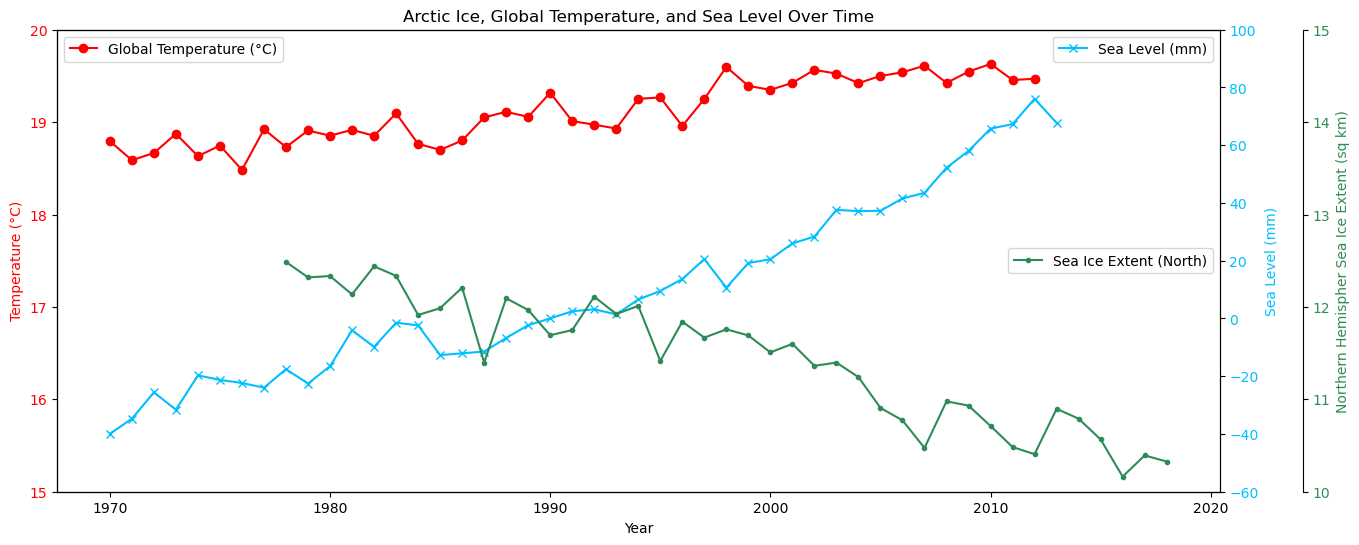

In [371]:
# Create the main plot figure
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot 1: Global Temperature
ax1.plot('Tyear', 'AverageTemperature', data=df_annual_mean_temp, color='red', label='Global Temperature (°C)', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Customise the scale so it appears higher
ax1.set_ylim(15, 20)  # Adjust the limits to the desired scale if needed

# Plot 2: Sea Level
ax2 = ax1.twinx()  # Create a third y-axis
ax2.plot('Syear', 'GMSL', data=df_annual_mean_sealevel, color='deepskyblue', label='Sea Level (mm)', marker='x')
ax2.set_ylabel('Sea Level (mm)', color='deepskyblue')
ax2.tick_params(axis='y', labelcolor='deepskyblue')

# Customise the scale so it appears higher
ax2.set_ylim(-60, 100)  # Adjust the limits to the desired scale if needed

# Plot 3: Arctic Ice Size - North
ax3 = ax1.twinx()  # Create a second y-axis
ax3.plot('Year', 'Extent', data=df_annual_mean_ice_north, color='seagreen', label='Sea Ice Extent (North)', marker='.')
ax3.set_ylabel('Northern Hemispher Sea Ice Extent (sq km)', color='seagreen')
ax3.tick_params(axis='y', labelcolor='seagreen')

# Customizing ice axis limits
ax3.set_ylim(10, 15)  # Adjust the limits to the desired scale if needed

# Offset the third axis to avoid overlap
ax3.spines['right'].set_position(('outward', 60))  # Moves the sea level Y-axis 60 pts to the right


# Optional: Add legends for clarity
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax3.legend(loc="center right")


# Display the plot
plt.title('Arctic Ice, Global Temperature, and Sea Level Over Time')
plt.show()

# Conclusion: 

From the above graphs, it is clear that:
1. Our mother earth is getting hotter
2. The sea ice in in the northern hemisphere (Artic Sea) is disappearing at an alarming rate
3. The sea level is getting higher at an alarming rate too
4. This gives a clear indication that the global warming, which is said to be caused by the greenhouse gas emission, has the effect towards disappearing sea ice, which in turn resulted in increase in sea level. 
5. The sea ice in the sothern hemisphere (Antarctica) was unexpected by the layman. The reason behind is complicated and also due to the non-linearity of the atmostphere effect. The easiest way to look at this is start from the Thinning Ozone Layer problem:
   - The Ozone Layer is thining centered above Antarctica
   - This leads to cooling of the stratosphere layer, which intensifies the polar vortex - a large area of low-pressure, cold air that circulates around Antarctica. 
   - This cooler, more stable atmosphere results in stronger and more persistent westerly winds around the continent, which, in turn, push sea ice outward, allowing it to spread over a larger area.
   - The ozone depletion leads to colder temperatures in the lower atmosphere, encouraging sea ice formation.
     

# Predicting with ML

#### Here come the difficult part, the merging data

we can't simply merge the raw data because the date are not aligned. All 3 datasets were also collected in a different manner. Global Average Land Temperature data set collects data once a month for 243 countries. Sea level data data was a global average collected a once a month, while Sea Ice size data is classified into North Hemisphere and South Hemisphere, and data collected a couple of times a month, sometime every other day, sometime everyday. So there are all not equal. 

The obvious choice here is to take the mean value, the question is whether taking annual average or monthly average.

If we choose monthly average, the Global Average Land Temperature would take mean temperature globally, then data oscillate between a small range. That, however, still remain a possible way.

If we choose annual average, the trend is obviously there, but the verbosity is less and not good to be used for machine learning and prediction.

Considering the efficiency, let's try to merge the data based on monthly average.

### Preparing data for merging

In [372]:
# we already have some of the needed df sets defined above, but for easy reference let's redo that again
df_ice_north = df_ice[ df_ice['hemisphere'] == 'north'] 
df_ice_south = df_ice[ df_ice['hemisphere'] == 'south'] 
df_monthly_mean_ice_north = df_ice_north.groupby(['Year','Month'])['Extent'].mean().reset_index()
#df_monthly_mean_ice_south = df_ice_south.groupby(['Year','Month'])['Extent'].mean().reset_index()


df_monthly_mean_temperature = df_temperature.groupby('dt')['AverageTemperature'].mean().reset_index()


In [373]:
df_monthly_mean_ice_north.keys()

Index(['Year', 'Month', 'Extent'], dtype='object')

In [374]:
# Add a date column for df_monthlymean_ice_north & df_monthlymean_ice_south
df_monthly_mean_ice_north['Time'] = pd.to_datetime(df_monthly_mean_ice_north[['Year','Month']].assign(day=1))
#df_monthly_mean_ice_south['Time'] = pd.to_datetime(df_monthly_mean_ice_south[['Year','Month']].assign(day=1))

# rename df_monthly_mean_temperature 'dt' column
df_monthly_mean_temperature.rename(columns={'dt': 'Time'}, inplace=True)

# Sea level date change to yyyy-mm-01
df_sea['Time'] = df_sea['Time'].apply(lambda x: x.replace(day=1))


In [375]:
print (df_monthly_mean_temperature)
print(df_monthly_mean_ice_north)
print(df_sea)

          Time  AverageTemperature
0   1970-01-01           14.402074
1   1970-02-01           15.155401
2   1970-03-01           16.664855
3   1970-04-01           18.858351
4   1970-05-01           20.708442
..         ...                 ...
511 2012-08-01           23.636789
512 2012-09-01           22.206306
513 2012-10-01           20.133950
514 2012-11-01           18.103921
515 2012-12-01           15.289136

[516 rows x 2 columns]
     Year  Month     Extent       Time
0    1978     10  10.402667 1978-10-01
1    1978     11  11.645133 1978-11-01
2    1978     12  13.667063 1978-12-01
3    1979      1  15.414000 1979-01-01
4    1979      2  16.175286 1979-02-01
..    ...    ...        ...        ...
478  2018      8   5.607935 2018-08-01
479  2018      9   4.713600 2018-09-01
480  2018     10   6.063484 2018-10-01
481  2018     11   9.804700 2018-11-01
482  2018     12  11.856516 2018-12-01

[483 rows x 4 columns]
           Time  GMSL  GMSL uncertainty  Syear
1080 1970-01-01 -

In [376]:
# Remove the uncessary columns
df_sea.drop('Syear',axis=1,inplace=True)
df_monthly_mean_ice_north.drop('Year', axis=1,inplace=True)
df_monthly_mean_ice_north.drop('Month', axis=1,inplace=True)
df_monthly_mean_ice_south.drop('Year', axis=1,inplace=True)
df_monthly_mean_ice_south.drop('Month', axis=1,inplace=True)

In [377]:
# clean up 


# Do a inner join and see how it goes



df = df_monthly_mean_temperature.merge(df_sea, on='Time', how='outer').merge(df_monthly_mean_ice_north, on='Time', how='outer')

#df = df_monthly_mean_temperature.merge(df_sea, on='Time', how='outer')

#df = df_monthly_mean_temperature.merge(df_sea, on='Time', how='outer', suffixes=('_temp', '_sea'))
#df = df.merge(df_monthly_mean_ice_north, on='Time', how='outer',suffixes=('_df', '_icenorth'))
#df = df.merge(df_monthly_mean_ice_south, on='Time', how='outer',suffixes=('_df', '_icesouth'))



In [378]:
# Create a numeric column for date so that we can parse this data to the ML model later
df['Time_numeric'] = df['Time'].apply(lambda x: x.timestamp())
print(df)

          Time  AverageTemperature  GMSL  GMSL uncertainty     Extent  \
0   1970-01-01           14.402074 -38.8               7.0        NaN   
1   1970-02-01           15.155401 -37.6               7.0        NaN   
2   1970-03-01           16.664855 -38.2               7.0        NaN   
3   1970-04-01           18.858351 -41.1               6.9        NaN   
4   1970-05-01           20.708442 -41.3               6.9        NaN   
..         ...                 ...   ...               ...        ...   
583 2018-08-01                 NaN   NaN               NaN   5.607935   
584 2018-09-01                 NaN   NaN               NaN   4.713600   
585 2018-10-01                 NaN   NaN               NaN   6.063484   
586 2018-11-01                 NaN   NaN               NaN   9.804700   
587 2018-12-01                 NaN   NaN               NaN  11.856516   

     Time_numeric  
0    0.000000e+00  
1    2.678400e+06  
2    5.097600e+06  
3    7.776000e+06  
4    1.036800e+07  
.. 

In [379]:
#### drop records with null values since ML cannot handle that
df = df.dropna()

In [380]:
df.describe()

Time  AverageTemperature        GMSL  \
count                            411          411.000000  411.000000   
mean   1995-10-31 19:12:42.043795584           19.205508   16.673723   
min              1978-10-01 00:00:00           13.621306  -28.000000   
25%              1987-04-16 00:00:00           16.502579   -4.100000   
50%              1995-11-01 00:00:00           19.483074    8.600000   
75%              2004-05-16 12:00:00           22.084678   36.100000   
max              2012-12-01 00:00:00           23.788690   82.400000   
std                              NaN            3.035520   26.614906   

       GMSL uncertainty      Extent  Time_numeric  
count        411.000000  411.000000  4.110000e+02  
mean           6.705353   11.627938  8.151668e+08  
min            6.200000    3.565600  2.760480e+08  
25%            6.500000    9.017935  5.455296e+08  
50%            6.600000   12.219067  8.151840e+08  
75%            6.800000   14.503850  1.084709e+09  
max            8.800000   16.341938  1.354320e+09  
std            0.398437    3.164439  3.123935e+08

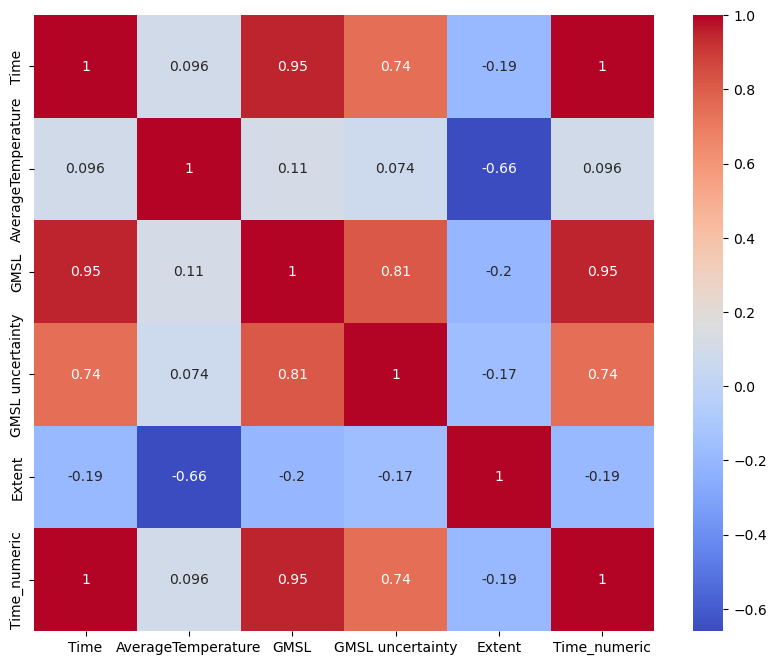

In [381]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm');

#### Observation: <br>
1. Global Temperature has relatively stronger relation against the Sea Ice Extent (be it Noth or South)
2. GMSL relation against GMSL uncertainty is not what we need here
3. GMSL also has correlation, albeith weaker, against North Hemisphere sea level.
4. The Sea Ice Extent for both North and South have strong correlation against each other

Let's first use all the available data and see how the Multi-regression model perform. 

### Modelling Global Mean Sea Level using Multi-regression 

In [382]:
X = df[['Time_numeric','AverageTemperature','Extent']]
y = df[['GMSL']]

In [383]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [384]:
# instantiating the model
mlr_model = LinearRegression()  

In [385]:
# fit() is used to pass training data to train the model
mlr_model.fit(X_train, y_train)

LinearRegression()

#### Model Prediction

In [386]:
# Predicting the values for testing inputs
y_pred = mlr_model.predict(X_test)

Let's compare the test data against predicted data 

In [387]:
# Assuming y_pred is a numpy ndarray of predictions and y_test is a pandas DataFrame of actual values
# Example
# y_pred = np.array([...])
# y_test = pd.DataFrame([...])

# Reset index of y_test for alignment
y_test_reset = y_test.reset_index(drop=True)

# Convert y_pred to a DataFrame
df_y_pred = pd.DataFrame(y_pred, columns=['prediction'])

# Concatenate y_test DataFrame with y_pred DataFrame column-wise, ensuring alignment
combined_y = pd.concat([y_test_reset.reset_index(drop=True), df_y_pred.reset_index(drop=True)], axis=1)

# Rename the columns to 'truth' and 'prediction' accordingly
combined_y.columns = ['truth', 'prediction']

# Might as well give ourselves a diff column too:
combined_y['pred-truth'] = combined_y['prediction'] - combined_y['truth']

# Display the first few rows to verify
combined_y.head(10)

truth  prediction  pred-truth
0   19.9   25.257785    5.357785
1  -12.4   -5.613388    6.786612
2   22.8   19.542785   -3.257215
3   24.8   30.405352    5.605352
4   47.9   48.705810    0.805810
5  -13.9   -6.050961    7.849039
6   21.9   25.922247    4.022247
7   31.4   35.245620    3.845620
8  -15.0  -24.703195   -9.703195
9   23.8   29.215354    5.415354

In [388]:
display(X.iloc[55])
newData = X.iloc[55]   # Just taking any random column for predicting.

# The  model takes inputs as array of values hence, we will conver the input
# to an array format

newInput = np.array(newData).reshape(1, -1)  # reshape(1, -1) means and 1 row and unknown number of columns

# Predicting the price for the given input
prediction = mlr_model.predict(newInput)

print("The predicted Sea Ice Extent for the given inputs is: ", prediction)
print("Actual Sea Ice Extent for the given input is: :", y.iloc[55])

Time_numeric          4.205952e+08
AverageTemperature    2.116460e+01
Extent                1.349131e+01
Name: 160, dtype: float64

The predicted Sea Ice Extent for the given inputs is:  [[-15.12996741]]
Actual Sea Ice Extent for the given input is: : GMSL    7.5
Name: 160, dtype: float64


#### Model Evaluation

In [389]:
# mterics from sklearn contains all the performance evaluation metrics

from sklearn import metrics


# Finding mean absolute error
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate the accuracy
accuracy_mlr = metrics.r2_score(y_test, y_pred)

print("Accuracy of the model is:", round(accuracy_mlr*100), "%")

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {accuracy_mlr:.2f}")

print("\nInterpretation of Metrics:")
print("R² Score is typically ideal as it indicates how well the model explains the variance in the target variable.")
print("MAE provides an interpretable measure of average error in the same units as the target variable.")
print("MSE highlights large deviations more heavily, making it useful for identifying models with fewer large errors but harder to interpret in the original units.")


Accuracy of the model is: 87 %

Model Performance Metrics:
Mean Squared Error (MSE): 64.28
Mean Absolute Error (MAE): 6.34
R² Score: 0.87

Interpretation of Metrics:
R² Score is typically ideal as it indicates how well the model explains the variance in the target variable.
MAE provides an interpretable measure of average error in the same units as the target variable.
MSE highlights large deviations more heavily, making it useful for identifying models with fewer large errors but harder to interpret in the original units.


### Modelling Sea Ice Extent using Multi-regression

In [390]:
X = df.drop(columns=['Extent', 'Time', 'GMSL uncertainty'])
y = df[['Extent']]

In [391]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [392]:
# instantiating the model

mlr_model = LinearRegression()  

In [393]:
# fit() is used to pass training data to train the model

mlr_model.fit(X_train, y_train)

LinearRegression()

#### Model Prediction

In [394]:
# Predicting the values for testing inputs

y_pred = mlr_model.predict(X_test)

Let's compare the test data against predicted data 

In [395]:
# Assuming y_pred is a numpy ndarray of predictions and y_test is a pandas DataFrame of actual values
# Example
# y_pred = np.array([...])
# y_test = pd.DataFrame([...])

# Reset index of y_test for alignment
y_test_reset = y_test.reset_index(drop=True)

# Convert y_pred to a DataFrame
df_y_pred = pd.DataFrame(y_pred, columns=['prediction'])

# Concatenate y_test DataFrame with y_pred DataFrame column-wise, ensuring alignment
combined_y = pd.concat([y_test_reset.reset_index(drop=True), df_y_pred.reset_index(drop=True)], axis=1)

# Rename the columns to 'truth' and 'prediction' accordingly
combined_y.columns = ['truth', 'prediction']

# Might as well give ourselves a diff column too:
combined_y['pred-truth'] = combined_y['prediction'] - combined_y['truth']

# Display the first few rows to verify
combined_y.head(10)

truth  prediction  pred-truth
0   9.476355    9.614324    0.137969
1  15.784857   15.251844   -0.533014
2  13.271871   14.399560    1.127689
3  15.815938   14.013512   -1.802426
4  12.219067   10.358327   -1.860739
5  11.382867   13.393275    2.010408
6  12.641194   14.348087    1.706893
7  14.512067   11.301093   -3.210974
8  11.208333    8.616489   -2.591845
9   7.351968   10.799371    3.447403

In [396]:
display(X.iloc[55])
newData = X.iloc[55]   # Just taking any random column for predicting.

# The  model takes inputs as array of values hence, we will conver the input
# to an array format

newInput = np.array(newData).reshape(1, -1)  # reshape(1, -1) means and 1 row and unknown number of columns

# Predicting the price for the given input
prediction = mlr_model.predict(newInput)

print("The predicted Sea Ice Extent for the given inputs is: ", prediction)
print("Actual Sea Ice Extent for the given input is: :", y.iloc[55])

AverageTemperature    2.116460e+01
GMSL                  7.500000e+00
Time_numeric          4.205952e+08
Name: 160, dtype: float64

The predicted Sea Ice Extent for the given inputs is:  [[10.30726469]]
Actual Sea Ice Extent for the given input is: : Extent    13.491312
Name: 160, dtype: float64


#### Model Evaluation

In [397]:
# mterics from sklearn contains all the performance evaluation metrics

from sklearn import metrics


# Finding mean absolute error
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate the accuracy
accuracy_mlr = metrics.r2_score(y_test, y_pred)

print("Accuracy of the model is:", round(accuracy_mlr*100), "%")

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {accuracy_mlr:.2f}")

print("\nInterpretation of Metrics:")
print("R² Score is typically ideal as it indicates how well the model explains the variance in the target variable.")
print("MAE provides an interpretable measure of average error in the same units as the target variable.")
print("MSE highlights large deviations more heavily, making it useful for identifying models with fewer large errors but harder to interpret in the original units.")


Accuracy of the model is: 47 %

Model Performance Metrics:
Mean Squared Error (MSE): 5.27
Mean Absolute Error (MAE): 1.98
R² Score: 0.47

Interpretation of Metrics:
R² Score is typically ideal as it indicates how well the model explains the variance in the target variable.
MAE provides an interpretable measure of average error in the same units as the target variable.
MSE highlights large deviations more heavily, making it useful for identifying models with fewer large errors but harder to interpret in the original units.


In the case of predicting the Sea Ice Extent data, it is most apropriately if we look at the accuracy of the model, so the metric R2 is considered the most relevance. In  this case, the model result isn't very good, only produce 45% accuracy. This is consistent with the MSE and MAE result - the absolute value range of Sea Ice Extent is in the range of 3-16, mean absolute error of 5.56 within this range is simply too significant, and also a big indicator that this model is not a good model. 

#### What if we use only time as the only input for prediction model?

### Modelling Sea Ice Extent against time

In [398]:
df['Time_numeric'] = df['Time'].apply(lambda x: x.timestamp())
df.head()

Time  AverageTemperature  GMSL  GMSL uncertainty     Extent  \
105 1978-10-01           19.357603 -17.7               6.7  10.402667   
106 1978-11-01           16.791384 -22.2               6.7  11.645133   
107 1978-12-01           15.081442 -25.2               6.7  13.667063   
108 1979-01-01           14.082587 -28.0               6.7  15.414000   
109 1979-02-01           15.220401 -26.9               6.7  16.175286   

     Time_numeric  
105   276048000.0  
106   278726400.0  
107   281318400.0  
108   283996800.0  
109   286675200.0

In [399]:
X = df[['Time_numeric']]
y = df[['Extent']]

In [400]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiating the model
slr_model = LinearRegression()  
slr_model.fit(X_train, y_train)


LinearRegression()

In [401]:
y_pred = slr_model.predict(X_test)


In [402]:
# Assuming y_pred is a numpy ndarray of predictions and y_test is a pandas DataFrame of actual values
# Example
# y_pred = np.array([...])
# y_test = pd.DataFrame([...])

# Reset index of y_test for alignment
y_test_reset = y_test.reset_index(drop=True)

# Convert y_pred to a DataFrame
df_y_pred = pd.DataFrame(y_pred, columns=['prediction'])

# Concatenate y_test DataFrame with y_pred DataFrame column-wise, ensuring alignment
combined_y = pd.concat([y_test_reset.reset_index(drop=True), df_y_pred.reset_index(drop=True)], axis=1)

# Rename the columns to 'truth' and 'prediction' accordingly
combined_y.columns = ['truth', 'prediction']

# Might as well give ourselves a diff column too:
combined_y['pred-truth'] = combined_y['prediction'] - combined_y['truth']

# Display the first few rows to verify
combined_y.head(10)

truth  prediction  pred-truth
0  12.151667   12.333903    0.182236
1   5.862433   11.075018    5.212585
2   7.828935   11.692766    3.863830
3  12.974000   10.980838   -1.993162
4  15.465714   12.295952   -3.169762
5   8.560600   12.315005    3.754405
6   8.915290   11.749305    2.834014
7  15.631533   12.517926   -3.113607
8   6.135742   10.910048    4.774306
9   6.301129   11.136359    4.835230

#### Model Evaluation for Sea Ice Extent Against Time

In [403]:

# Finding mean absolute error
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate the accuracy
accuracy_slr = metrics.r2_score(y_test, y_pred)

print("Accuracy of the model is:", round(accuracy_slr*100), "%")

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {accuracy_slr:.2f}")


Accuracy of the model is: 4 %

Model Performance Metrics:
Mean Squared Error (MSE): 10.05
Mean Absolute Error (MAE): 2.79
R² Score: 0.04


The accuracy in this case is even lower, and this is not particularly surprising since the correlation between 'Time' and 'Extent' is only -0.19. 

### Modelling Sea Level against Time


Since the correlation between time and Sea level is high, let's try to predict the Sea Level rise over time

In [404]:
X = df[['Time_numeric']]
y = df[['GMSL']]

In [405]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiating the model
slr_model = LinearRegression()  
slr_model.fit(X_train, y_train)

LinearRegression()

In [406]:
y_pred = slr_model.predict(X_test)

# Assuming y_pred is a numpy ndarray of predictions and y_test is a pandas DataFrame of actual values
# Example
# y_pred = np.array([...])
# y_test = pd.DataFrame([...])

# Reset index of y_test for alignment
y_test_reset = y_test.reset_index(drop=True)

# Convert y_pred to a DataFrame
df_y_pred = pd.DataFrame(y_pred, columns=['prediction'])

# Concatenate y_test DataFrame with y_pred DataFrame column-wise, ensuring alignment
combined_y = pd.concat([y_test_reset.reset_index(drop=True), df_y_pred.reset_index(drop=True)], axis=1)

# Rename the columns to 'truth' and 'prediction' accordingly
combined_y.columns = ['truth', 'prediction']

# Might as well give ourselves a diff column too:
combined_y['pred-truth'] = combined_y['prediction'] - combined_y['truth']

# Display the first few rows to verify
combined_y.head(50)

truth  prediction  pred-truth
0     7.1   23.019788   15.919788
1    22.2   28.126982    5.926982
2    35.9   35.986890    0.086890
3     6.5   23.229385   16.729385
4    27.1   31.312864    4.212864
5   -15.4   -9.300156    6.099844
6    49.0   50.875304    1.875304
7    -2.0  -19.081376  -17.081376
8    67.6   53.229783  -14.370217
9    60.1   48.967966  -11.132034
10   41.6   39.186746   -2.413254
11   -1.0    5.364686    6.364686
12   37.8   43.022382    5.222382
13  -13.1  -17.809817   -4.709817
14    8.6   14.733697    6.133697
15    4.3  -15.259714  -19.559714
16   50.5   46.620473   -3.879527
17  -14.4  -16.957454   -2.557454
18  -10.8   -5.268897    5.531103
19  -13.1   -9.726338    3.373662
20   31.4   45.572485   14.172485
21  -10.6  -18.026402   -7.426402
22  -19.2  -22.274245   -3.074245
23   -6.4   -1.859443    4.540557
24   -2.7  -20.150323  -17.450323
25   35.2   42.805797    7.605797
26   40.4   38.970162   -1.429838
27    7.2   23.445969   16.245969
28    4.1    6.433634    2.333634
29   23.8   30.048293    6.248293
30   34.3   45.768110   11.468110
31   33.5   35.777293    2.277293
32  -13.3   -6.966637    6.333363
33   -9.1   -3.131001    5.968999
34   72.1   56.827874  -15.272126
35   40.8   43.860772    3.060772
36   62.6   57.470640   -5.129360
37  -10.9   -4.842715    6.057285
38   -6.4  -10.997897   -4.597897
39    3.4   12.183594    8.783594
40   33.9   38.117799    4.217799
41    6.4   13.238568    6.838568
42    8.9   24.514917   15.614917
43  -10.3  -16.740870   -6.440870
44   60.1   48.751382  -11.348618
45   24.9   33.227189    8.327189
46  -19.9  -24.614752   -4.714752
47   67.0   57.261043   -9.738957
48   68.8   52.796615  -16.003385
49   39.2   38.543980   -0.656020

#### Model Evaluation for Sea Level against Time

In [407]:
# mterics from sklearn contains all the performance evaluation metrics

# Finding mean absolute error
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate the accuracy
accuracy_slr = metrics.r2_score(y_test, y_pred)

print("Accuracy of the model is:", round(accuracy_slr*100), "%")

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {accuracy_slr:.2f}")


Accuracy of the model is: 90 %

Model Performance Metrics:
Mean Squared Error (MSE): 75.46
Mean Absolute Error (MAE): 7.09
R² Score: 0.90


#### The result is good, and let's just see how the future sea level would look like in the chart

In [408]:
future_dates = pd.date_range(start=df['Time'].max(), periods=30*12+1, freq='MS')[1:]  # 30 years of monthly intervals
future_df = pd.DataFrame({"Time": future_dates})
future_df['AverageTemperature'] = np.nan
future_df['GMSL'] = np.nan
future_df['GMSL uncertainty'] = np.nan
future_df['Extent'] = np.nan
future_df['Time_numeric'] = future_df['Time'].apply(lambda x: x.timestamp())


In [409]:
# Feed to the model
X_test = future_df[['Time_numeric']]
y_pred = slr_model.predict(X_test)


In [410]:
future_df['GMSL'] = y_pred
print(future_df)

          Time  AverageTemperature        GMSL  GMSL uncertainty  Extent  \
0   2013-01-01                 NaN   60.670496               NaN     NaN   
1   2013-02-01                 NaN   60.887080               NaN     NaN   
2   2013-03-01                 NaN   61.082705               NaN     NaN   
3   2013-04-01                 NaN   61.299289               NaN     NaN   
4   2013-05-01                 NaN   61.508886               NaN     NaN   
..         ...                 ...         ...               ...     ...   
355 2042-08-01                 NaN  136.153565               NaN     NaN   
356 2042-09-01                 NaN  136.370149               NaN     NaN   
357 2042-10-01                 NaN  136.579746               NaN     NaN   
358 2042-11-01                 NaN  136.796331               NaN     NaN   
359 2042-12-01                 NaN  137.005928               NaN     NaN   

     Time_numeric  
0    1.356998e+09  
1    1.359677e+09  
2    1.362096e+09  
3    1.

#### Concatenage with the orginal df and future_df to plot a graph

In [411]:
combine_df = pd.concat([df, future_df], axis=0, ignore_index=True)


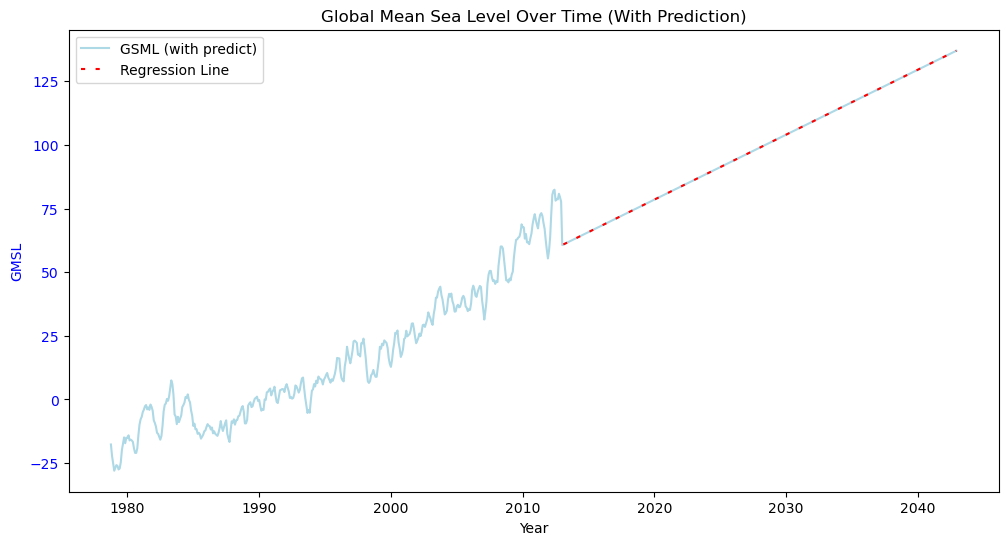

In [412]:
# Plot the annual mean sea level
plt.figure(figsize=(12, 6))
ax1=sns.lineplot(x='Time', y='GMSL', data=combine_df, color="lightblue", label='GSML (with predict)')
ax1.set_ylabel("Sea Ice Size (millions sq km)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title("Global Mean Sea Level Over Time Against Predicted Data ")

# draw a line based on Y = aX + b formula

slope = slr_model.coef_[0]  # This is 'a'
intercept = slr_model.intercept_  #This is 'b' 

data = combine_df[combine_df['Time'] > '2013-01-01']
data['Time_numeric'] = data['Time'].astype(np.int64) // 10**9  # Convert to seconds
data['Y'] = slope * data['Time_numeric'] + intercept

ax2=sns.lineplot(data=data, x='Time', y='Y',color='red', linestyle=(0, (2, 5)), label='Regression Line')


# Add labels and title
plt.xlabel("Year")
plt.ylabel("GMSL")
plt.title("Global Mean Sea Level Over Time (With Prediction)")

# Display the plot
plt.show()

The above graph consists of 3 components:
1. The first part of the blue line is the raw data from original Global Mean Sea Level (GSML) dataset.
2. After year 2013, the blue line represents the data provided by the machine learning, predicting the Global Sea Level.
3. The red dotted line is drawn based on the coefficient and intercept produced by the linear regression model. It is not surprise that this is exactly the same as no.2 above, the purpose here is just to validate machine learning produce a linear prediction. 

# Conclusion

1. When the ML model uses Average Temperature, Sea Ice Extent and Time as parameter to predict Sea Level, the accuracy is around 90%
2. When the ML model uses Time and Sea Level data to predict Sea Ice Extent, the accuracy dropped to around 40%
3. When the ML model uses only Time as the only input to predict Sea Ice Extent, the accuracy dropped to 1%. This is not exactly surprise from the correlation table. 
4. When the ML model uses only Time as the only input to predict Sea Level, the accuracy is around 91%. This is also not surprising from the correlation table. 

# Final Comment

This project progress well at the beginning. As I progressed I discovered a different way to invesigate the data through data anomaly (reference: <a href="https://nsidc.org/data/seaice_index">NSIDC National Snow and Ice Data Center </a>). However I had to take my time off to prepare for an important job interview, including big effort in preparing presentation slide for the interview, I did not have enough time to do what I wish. Given more time, I would have added different graphs to investigate the climate change better. 



My linkedin profile: <a href="https://www.linkedin.com/in/bryan-lee-33716a112/"> Bryan Lee </a>